# Rozpoznawanie typów Pokemonów

###### Konrad Magiera 291090, Mateusz Smoliński 291099

Problemem do rozwiązania w tym projekcie jest rozpoznawanie `typów Pokemonów` w zależności od statystyk. 

`Importy` potrzebne do całości projektu

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon = pokemon.drop(["#"],axis = 1)
pokemon = pokemon.set_index('Name')
pokemon.rename(columns={'Type 1':'Type1', 'Type 2':'Type2', 'Sp. Atk':'SpAtk', 'Sp. Def':'SpDef'}, inplace=True)
dostepne_typy = pokemon.Type1.unique()
pokemon_bez_nan = pokemon.copy()
pokemon_bez_nan['Type2'].fillna(value='None', inplace=True)
display(pokemon.head())
display(pokemon.describe())
print("Liczba typow: %d" % dostepne_typy.size)

Type1   Type2  Total  HP  Attack  Defense  SpAtk  \
Name                                                                      
Bulbasaur              Grass  Poison    318  45      49       49     65   
Ivysaur                Grass  Poison    405  60      62       63     80   
Venusaur               Grass  Poison    525  80      82       83    100   
VenusaurMega Venusaur  Grass  Poison    625  80     100      123    122   
Charmander              Fire     NaN    309  39      52       43     60   

                       SpDef  Speed  Generation  Legendary  
Name                                                        
Bulbasaur                 65     45           1      False  
Ivysaur                   80     60           1      False  
Venusaur                 100     80           1      False  
VenusaurMega Venusaur    120     80           1      False  
Charmander                50     65           1      False

Total          HP      Attack     Defense       SpAtk       SpDef  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   435.10250   69.258750   79.001250   73.842500   72.820000   71.902500   
std    119.96304   25.534669   32.457366   31.183501   32.722294   27.828916   
min    180.00000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    330.00000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    450.00000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    515.00000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    780.00000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6.00000

Liczba typow: 18


Z powyższej tabeli wynika, że w zadanym zbiorze danych znajduje się 800 obiektów, wśród których można rozróżnić 18 typów. 

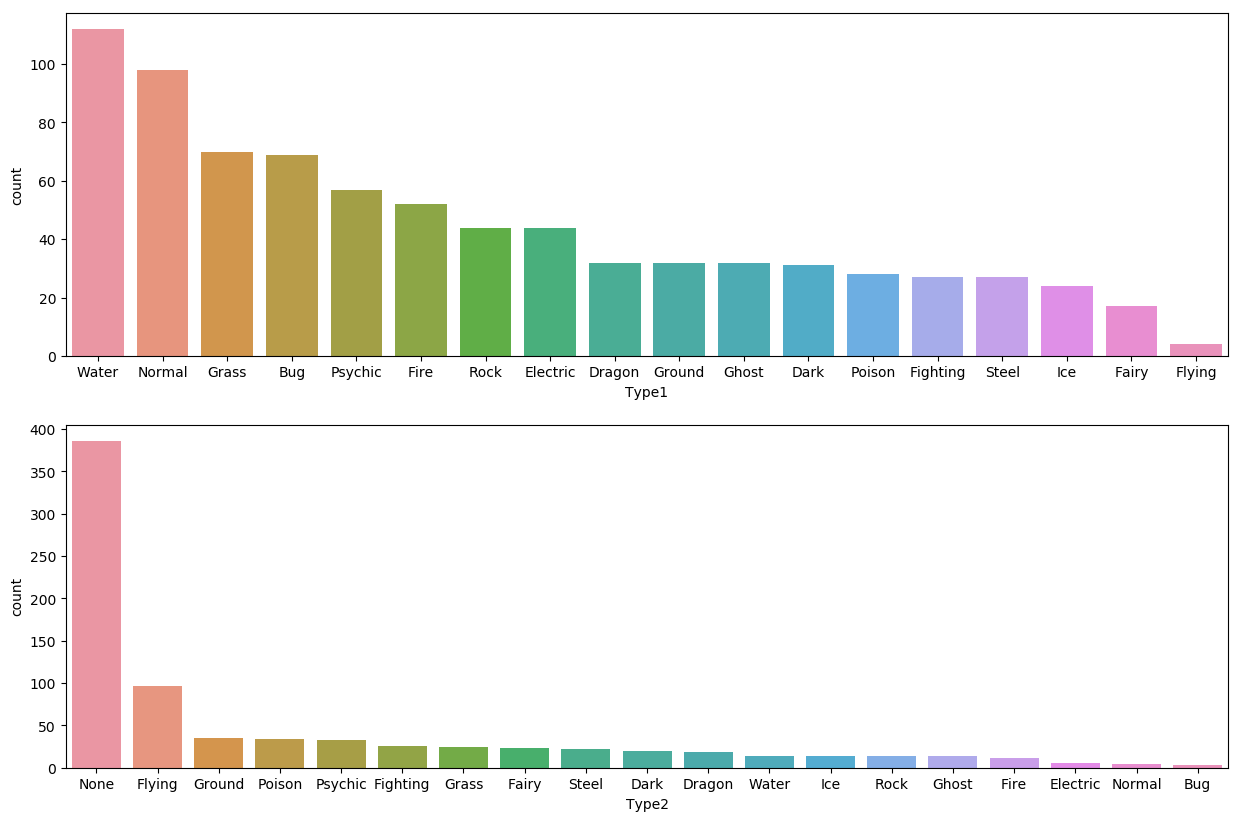

In [8]:
fig = plt.figure(figsize=(15, 10), dpi=100)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1 = sns.countplot(x="Type1", order= pokemon['Type1'].value_counts().index, data = pokemon, ax = ax1)
ax2 = sns.countplot(x="Type2", order= pokemon_bez_nan['Type2'].value_counts().index, data = pokemon_bez_nan, ax = ax2)
plt.show()

Z wykresów wynika, że:
* Typ `Normal` i `Water` występują najczęściej jako `Type1`,
* `Type2` wygląda jakby miał na celu wyrównać liczbe pokemonów każdego typu, np. pokemonów typu `Flying` jest najmniej dla typu podstawowego, a dla dodatkowego najwięcej,
* `Type2` posiada około połowy pokemonów, wszystkie pozostałe uzupełniliśmy dla tego wykresu wartością `None`.

In [9]:
pokemon_bez_nan = pokemon.dropna(axis = 0, how="any")
print("Usuwam %d pokemonow z Type2 == NaN" % sum(pd.isnull(pokemon["Type2"])))
pokemon_bez_nan.head()

Usuwam 386 pokemonow z Type2 == NaN


Type1   Type2  Total  HP  Attack  Defense  SpAtk  \
Name                                                                      
Bulbasaur              Grass  Poison    318  45      49       49     65   
Ivysaur                Grass  Poison    405  60      62       63     80   
Venusaur               Grass  Poison    525  80      82       83    100   
VenusaurMega Venusaur  Grass  Poison    625  80     100      123    122   
Charizard               Fire  Flying    534  78      84       78    109   

                       SpDef  Speed  Generation  Legendary  
Name                                                        
Bulbasaur                 65     45           1      False  
Ivysaur                   80     60           1      False  
Venusaur                 100     80           1      False  
VenusaurMega Venusaur    120     80           1      False  
Charizard                 85    100           1      False

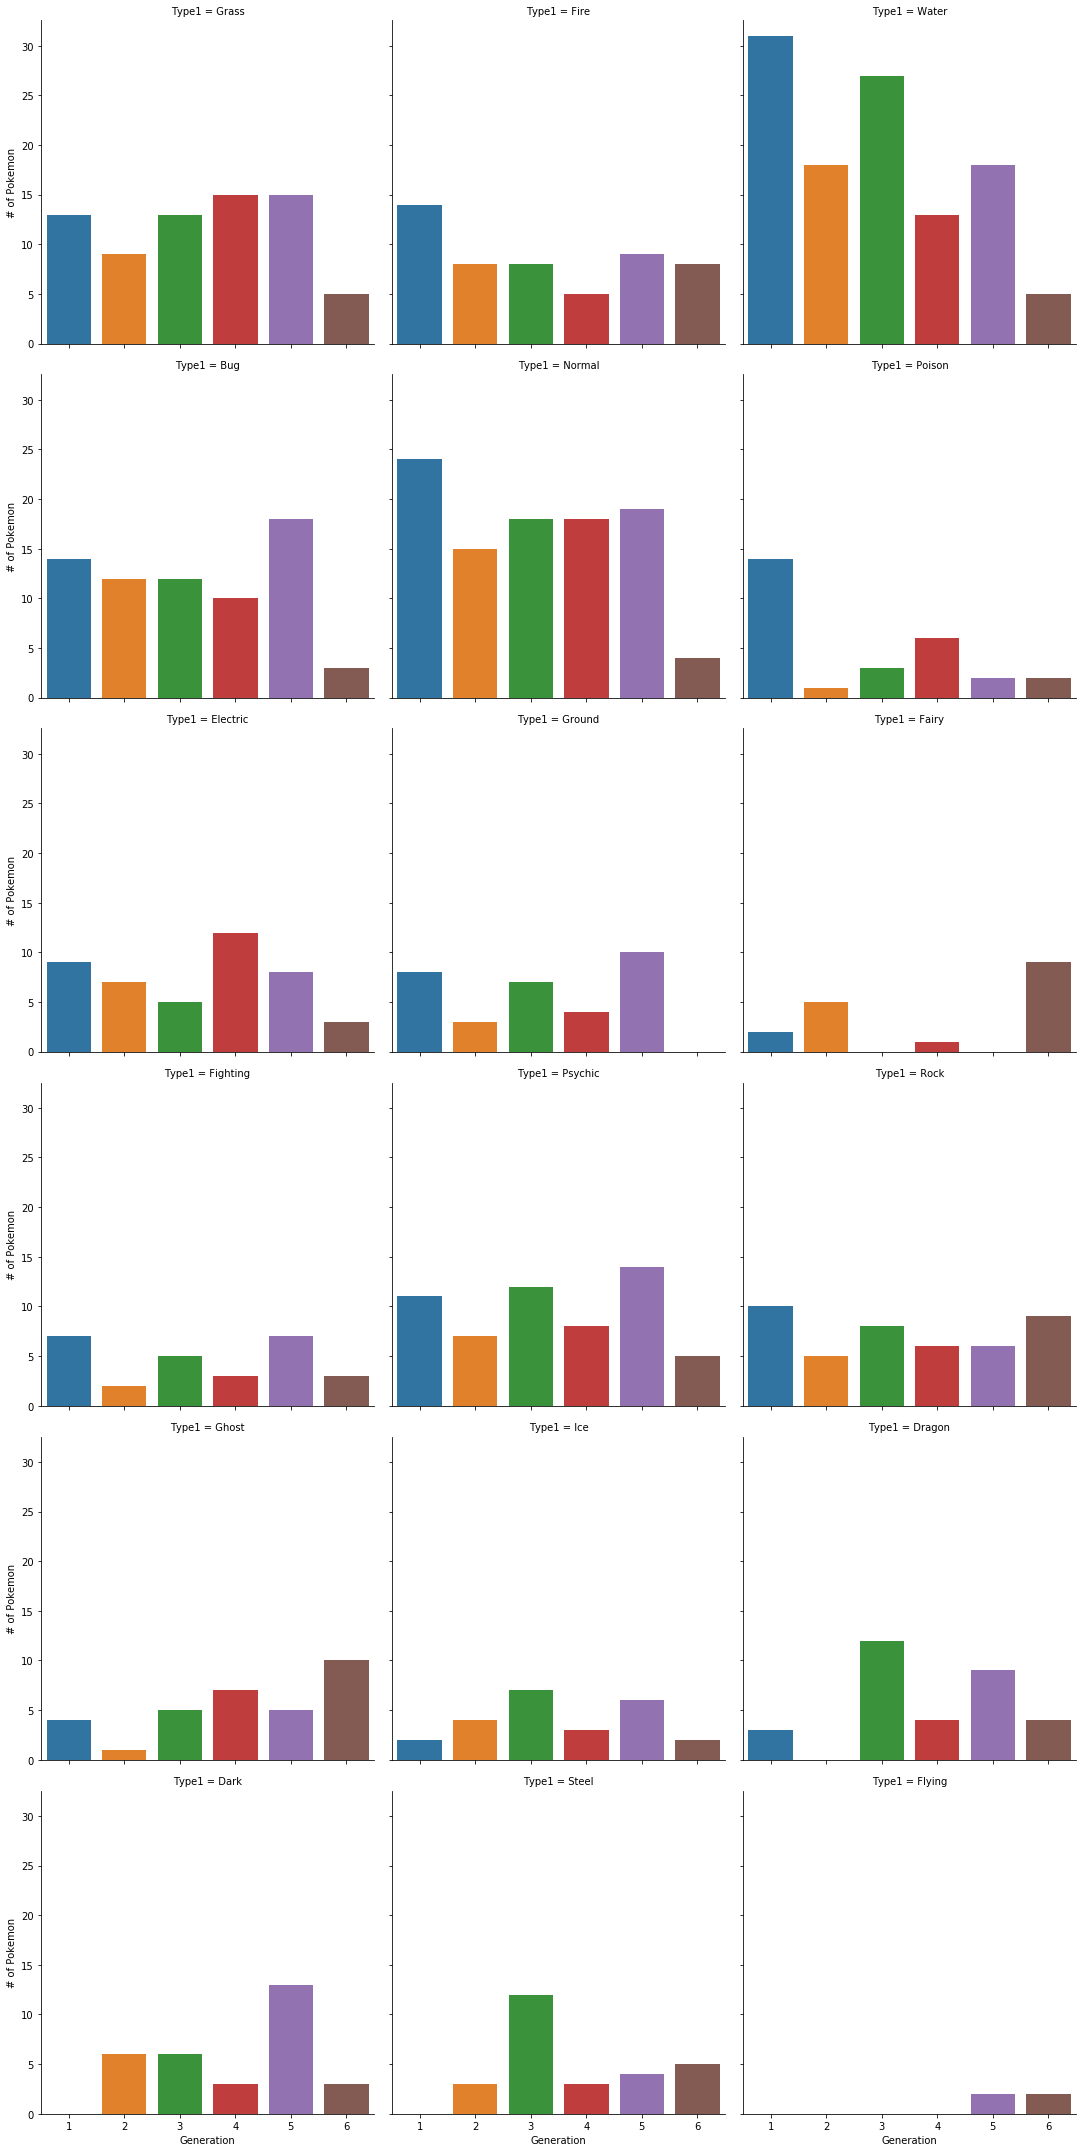

In [10]:
sns.catplot(x='Generation', data=pokemon, col='Type1', kind='count', col_wrap=3
    ).set_axis_labels('Generation', '# of Pokemon')

Dla typu podstawowego `Type1` można wyciągnąć następujące wnioski:
* Typy `Water` i `Normal` pojawiały się licznie przez 5 generacji, w 6 generacji dodano ich znacznie mniej
* Typ `Dark` pojawił się dopiero w 2 generacji i największy przyrost osobników odnotowany został w 5 generacji
* Pokemony typu `Steel` największy przyrost miały w generacji 3
* `Flying` jako typ podstawowy stał się dopiero w 5 generacji, wcześniej musiał być typem dodatkowym, stąd brak takich pokemonów przez 4 generacje

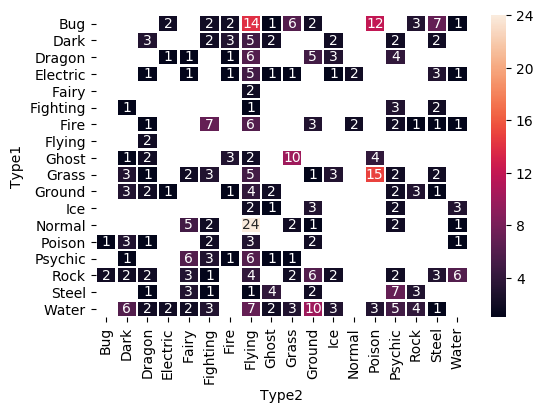

In [11]:
plt.figure(dpi = 100)
sns.heatmap(pokemon_bez_nan.groupby(['Type1', 'Type2']).size().unstack(),
    linewidths=1, annot=True)

Najczęstsze połączenia typów (`Type1/Type2`):
* `Normal/Flying` - 24
* `Grass/Poison` - 15
* `Bug/Flying` - 14
* `Bug/Poison` - 12
* `Water/Ground` - 10
* `Ghost/Grass` - 10<br>
Najczęściej występujące pary po odwróceniu typów nie są równie pospolite, np. `Flying/Normal` - 0, `Poison/Bug` - 1

In [12]:
pokemon_bez_legend_generation = pokemon.copy()
pokemon_bez_legend_generation = pokemon_bez_legend_generation.drop(["Generation", "Legendary"],axis = 1)
pokemon_corr = pokemon_bez_legend_generation.corr()
pokemon_corr

Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.618748  0.736211  0.612787  0.747250  0.717609  0.575943
HP       0.618748  1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.736211  0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.612787  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
SpAtk    0.747250  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
SpDef    0.717609  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.575943  0.175952  0.381240  0.015227  0.473018  0.259133  1.000000

Parametry pokemonów nie są dostatecznie silnie skorelowane. Prawie wszystkie statystyki są silnie skorelowane z wartością `Total`, czym trudno się dziwić. Jednak można zauważyć, że `SpDef` jest skorelowany z `Defense` oraz `SpAtk`. Warto przeprowadzić taką analizę w obrębie poszczególnych typów.

In [7]:
for typ in dostepne_typy:
    print(typ)
    pokemon_corr = pokemon_bez_legend_generation[(pokemon_bez_legend_generation.Type1 == typ) | 
                                                 (pokemon_bez_legend_generation.Type2 == typ)].corr()
    display(pokemon_corr)
    print("\n\n")

Grass


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.794219  0.797910  0.681216  0.761167  0.714322  0.628974
HP       0.794219  1.000000  0.697179  0.480884  0.587854  0.507461  0.305164
Attack   0.797910  0.697179  1.000000  0.539378  0.555039  0.374845  0.338922
Defense  0.681216  0.480884  0.539378  1.000000  0.249133  0.521559  0.218472
SpAtk    0.761167  0.587854  0.555039  0.249133  1.000000  0.472417  0.431635
SpDef    0.714322  0.507461  0.374845  0.521559  0.472417  1.000000  0.329279
Speed    0.628974  0.305164  0.338922  0.218472  0.431635  0.329279  1.000000




Fire


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.784901  0.744721  0.765468  0.825827  0.817696  0.586201
HP       0.784901  1.000000  0.648249  0.536226  0.507483  0.536148  0.425290
Attack   0.744721  0.648249  1.000000  0.465054  0.407533  0.415465  0.387741
Defense  0.765468  0.536226  0.465054  1.000000  0.661928  0.635251  0.150551
SpAtk    0.825827  0.507483  0.407533  0.661928  1.000000  0.754172  0.344775
SpDef    0.817696  0.536148  0.415465  0.635251  0.754172  1.000000  0.387119
Speed    0.586201  0.425290  0.387741  0.150551  0.344775  0.387119  1.000000




Water


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.647162  0.754705  0.653184  0.836930  0.743752  0.458143
HP       0.647162  1.000000  0.412847  0.234493  0.438366  0.441001  0.108121
Attack   0.754705  0.412847  1.000000  0.513098  0.516670  0.328523  0.305183
Defense  0.653184  0.234493  0.513098  1.000000  0.479431  0.385738 -0.002940
SpAtk    0.836930  0.438366  0.516670  0.479431  1.000000  0.623591  0.350914
SpDef    0.743752  0.441001  0.328523  0.385738  0.623591  1.000000  0.258623
Speed    0.458143  0.108121  0.305183 -0.002940  0.350914  0.258623  1.000000




Bug


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.731576  0.763947  0.579000  0.629788  0.681593  0.575419
HP       0.731576  1.000000  0.561326  0.151479  0.693036  0.269540  0.496849
Attack   0.763947  0.561326  1.000000  0.358098  0.280813  0.287667  0.439544
Defense  0.579000  0.151479  0.358098  1.000000  0.067414  0.678214 -0.146708
SpAtk    0.629788  0.693036  0.280813  0.067414  1.000000  0.265231  0.446833
SpDef    0.681593  0.269540  0.287667  0.678214  0.265231  1.000000  0.096672
Speed    0.575419  0.496849  0.439544 -0.146708  0.446833  0.096672  1.000000




Normal


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.558671  0.741030  0.780184  0.725299  0.785925  0.591645
HP       0.558671  1.000000  0.126360  0.115953  0.333944  0.609178 -0.055083
Attack   0.741030  0.126360  1.000000  0.738593  0.383391  0.355327  0.524157
Defense  0.780184  0.115953  0.738593  1.000000  0.486131  0.574336  0.474079
SpAtk    0.725299  0.333944  0.383391  0.486131  1.000000  0.529318  0.371626
SpDef    0.785925  0.609178  0.355327  0.574336  0.529318  1.000000  0.222050
Speed    0.591645 -0.055083  0.524157  0.474079  0.371626  0.222050  1.000000




Poison


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.682005  0.724510  0.664595  0.688078  0.782185  0.644072
HP       0.682005  1.000000  0.662259  0.420649  0.298986  0.474635  0.186142
Attack   0.724510  0.662259  1.000000  0.419302  0.218643  0.389509  0.450642
Defense  0.664595  0.420649  0.419302  1.000000  0.326811  0.528752  0.198532
SpAtk    0.688078  0.298986  0.218643  0.326811  1.000000  0.514047  0.342255
SpDef    0.782185  0.474635  0.389509  0.528752  0.514047  1.000000  0.386650
Speed    0.644072  0.186142  0.450642  0.198532  0.342255  0.386650  1.000000




Electric


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.654748  0.715410  0.793473  0.877579  0.847193  0.422946
HP       0.654748  1.000000  0.570475  0.371642  0.487150  0.484571  0.027550
Attack   0.715410  0.570475  1.000000  0.443305  0.539873  0.381955  0.152172
Defense  0.793473  0.371642  0.443305  1.000000  0.742104  0.826361  0.043876
SpAtk    0.877579  0.487150  0.539873  0.742104  1.000000  0.723061  0.247391
SpDef    0.847193  0.484571  0.381955  0.826361  0.723061  1.000000  0.270650
Speed    0.422946  0.027550  0.152172  0.043876  0.247391  0.270650  1.000000




Ground


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.746087  0.859018  0.629793  0.802513  0.801432  0.455608
HP       0.746087  1.000000  0.671637  0.321803  0.569353  0.522838  0.190456
Attack   0.859018  0.671637  1.000000  0.470345  0.663274  0.519215  0.315208
Defense  0.629793  0.321803  0.470345  1.000000  0.263251  0.410018 -0.040411
SpAtk    0.802513  0.569353  0.663274  0.263251  1.000000  0.752858  0.308809
SpDef    0.801432  0.522838  0.519215  0.410018  0.752858  1.000000  0.363127
Speed    0.455608  0.190456  0.315208 -0.040411  0.308809  0.363127  1.000000




Fairy


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.340278  0.795107  0.738094  0.867350  0.785463  0.728758
HP       0.340278  1.000000  0.307211  0.029366  0.255834 -0.009151 -0.002707
Attack   0.795107  0.307211  1.000000  0.586963  0.628224  0.365830  0.515683
Defense  0.738094  0.029366  0.586963  1.000000  0.380550  0.693940  0.393180
SpAtk    0.867350  0.255834  0.628224  0.380550  1.000000  0.693501  0.726169
SpDef    0.785463 -0.009151  0.365830  0.693940  0.693501  1.000000  0.506728
Speed    0.728758 -0.002707  0.515683  0.393180  0.726169  0.506728  1.000000




Fighting


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.551312  0.773240  0.738258  0.697728  0.695450  0.767760
HP       0.551312  1.000000  0.441905  0.413929  0.308174  0.183273  0.112240
Attack   0.773240  0.441905  1.000000  0.508068  0.332696  0.489952  0.447799
Defense  0.738258  0.413929  0.508068  1.000000  0.308367  0.622818  0.422494
SpAtk    0.697728  0.308174  0.332696  0.308367  1.000000  0.212121  0.636338
SpDef    0.695450  0.183273  0.489952  0.622818  0.212121  1.000000  0.533398
Speed    0.767760  0.112240  0.447799  0.422494  0.636338  0.533398  1.000000




Psychic


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.506955  0.798643  0.611986  0.721433  0.706557  0.673953
HP       0.506955  1.000000  0.297443  0.442800  0.210908  0.332566 -0.004215
Attack   0.798643  0.297443  1.000000  0.393419  0.527482  0.340644  0.547831
Defense  0.611986  0.442800  0.393419  1.000000  0.096757  0.589224  0.112454
SpAtk    0.721433  0.210908  0.527482  0.096757  1.000000  0.368848  0.555412
SpDef    0.706557  0.332566  0.340644  0.589224  0.368848  1.000000  0.330973
Speed    0.673953 -0.004215  0.547831  0.112454  0.555412  0.330973  1.000000




Rock


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.525492  0.584302  0.410473  0.641471  0.574106  0.537986
HP       0.525492  1.000000  0.623942 -0.099263  0.301671 -0.065134  0.269983
Attack   0.584302  0.623942  1.000000 -0.141108  0.352997 -0.198726  0.490175
Defense  0.410473 -0.099263 -0.141108  1.000000 -0.091855  0.566386 -0.290908
SpAtk    0.641471  0.301671  0.352997 -0.091855  1.000000  0.249276  0.479710
SpDef    0.574106 -0.065134 -0.198726  0.566386  0.249276  1.000000  0.042181
Speed    0.537986  0.269983  0.490175 -0.290908  0.479710  0.042181  1.000000




Ghost


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.655525  0.532609  0.459620  0.634252  0.666008  0.550988
HP       0.655525  1.000000  0.339532  0.087629  0.301023  0.242485  0.370914
Attack   0.532609  0.339532  1.000000  0.194622  0.145044  0.092132  0.094717
Defense  0.459620  0.087629  0.194622  1.000000 -0.150642  0.588414 -0.170391
SpAtk    0.634252  0.301023  0.145044 -0.150642  1.000000  0.295559  0.610372
SpDef    0.666008  0.242485  0.092132  0.588414  0.295559  1.000000  0.087735
Speed    0.550988  0.370914  0.094717 -0.170391  0.610372  0.087735  1.000000




Ice


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.718573  0.735914  0.570914  0.749123  0.616802  0.480776
HP       0.718573  1.000000  0.632175  0.313161  0.450788  0.325168  0.108451
Attack   0.735914  0.632175  1.000000  0.510916  0.328339  0.059958  0.321367
Defense  0.570914  0.313161  0.510916  1.000000  0.222553  0.113802 -0.087008
SpAtk    0.749123  0.450788  0.328339  0.222553  1.000000  0.575653  0.323636
SpDef    0.616802  0.325168  0.059958  0.113802  0.575653  1.000000  0.317918
Speed    0.480776  0.108451  0.321367 -0.087008  0.323636  0.317918  1.000000




Dragon


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.827010  0.777039  0.816435  0.893663  0.749355  0.760844
HP       0.827010  1.000000  0.655749  0.681522  0.639376  0.543336  0.534396
Attack   0.777039  0.655749  1.000000  0.675071  0.580957  0.302574  0.539520
Defense  0.816435  0.681522  0.675071  1.000000  0.606549  0.548740  0.516104
SpAtk    0.893663  0.639376  0.580957  0.606549  1.000000  0.726783  0.650108
SpDef    0.749355  0.543336  0.302574  0.548740  0.726783  1.000000  0.472228
Speed    0.760844  0.534396  0.539520  0.516104  0.650108  0.472228  1.000000




Dark


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.737664  0.780885  0.665067  0.719801  0.773214  0.498161
HP       0.737664  1.000000  0.506913  0.498352  0.373582  0.527931  0.319066
Attack   0.780885  0.506913  1.000000  0.364238  0.561501  0.432142  0.351886
Defense  0.665067  0.498352  0.364238  1.000000  0.164215  0.821925 -0.052954
SpAtk    0.719801  0.373582  0.561501  0.164215  1.000000  0.360674  0.434142
SpDef    0.773214  0.527931  0.432142  0.821925  0.360674  1.000000  0.083397
Speed    0.498161  0.319066  0.351886 -0.052954  0.434142  0.083397  1.000000




Steel


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.774303  0.684200  0.444762  0.627769  0.457719  0.624282
HP       0.774303  1.000000  0.549214  0.223898  0.424792  0.312810  0.499194
Attack   0.684200  0.549214  1.000000  0.161446  0.360959 -0.102049  0.500435
Defense  0.444762  0.223898  0.161446  1.000000 -0.197857  0.316915 -0.164579
SpAtk    0.627769  0.424792  0.360959 -0.197857  1.000000  0.159829  0.589918
SpDef    0.457719  0.312810 -0.102049  0.316915  0.159829  1.000000 -0.017874
Speed    0.624282  0.499194  0.500435 -0.164579  0.589918 -0.017874  1.000000




Flying


Total        HP    Attack   Defense     SpAtk     SpDef     Speed
Total    1.000000  0.792348  0.803795  0.764358  0.801935  0.680427  0.641953
HP       0.792348  1.000000  0.601351  0.524421  0.607747  0.491416  0.401803
Attack   0.803795  0.601351  1.000000  0.534366  0.555096  0.273839  0.559515
Defense  0.764358  0.524421  0.534366  1.000000  0.437808  0.661033  0.333042
SpAtk    0.801935  0.607747  0.555096  0.437808  1.000000  0.490626  0.419003
SpDef    0.680427  0.491416  0.273839  0.661033  0.490626  1.000000  0.197222
Speed    0.641953  0.401803  0.559515  0.333042  0.419003  0.197222  1.000000

Zauważalnie skorelowane pary atrybutów dla każdego typu:
1. `Grass`: HP i Attack, HP i SpAtk
2. `Fire`: SpAtk i SpDef, HP i Attack
3. `Water`: SpAtk i SpDef, Attack i SpAtk
4. `Bug`: HP i SpAtk, Defense i SpDef
5. `Normal`: Attack i Defense, HP i SpDef
6. `Poison`: Attack i HP, Defense i SpDef
7. `Electric`: Defense i SpDef, Defense i SpAtk
8. `Ground`: SpAtk i SpDef, HP i Attack
9. `Fairy`: SpAtk i Speed, Defense i SpDef
10. `Fighting`: SpAtk i Speed, Defense i SpDef
11. `Psychic`: Defense i SpDef, SpAtk i Speed
12. `Rock`: HP i Attack, Defense i SpDef
13. `Ghost`: SpAtk i Speed, Defense i SpDef
14. `Ice`: HP i Attack, SpAtk i SpDef
15. `Dragon`: HP i Defense, Attack i Defense
16. `Dark`: Defense i SpDef, Attack i SpAtk
17. `Steel`: SpAtk i Speed, HP i Attack
18. `Flying`: Defense i SpDef, HP i SpAtk

Z tej obserwacji można wywnioskować, że najbardziej znaczącymi parami atrybutów są:
* Defense i SpDef - 10 wystąpień
* HP i Attack - 7 wystąpień
* SpAtk i Speed - 5 wystąpień
* SpAtk i SpDef - 4 wystąpienia

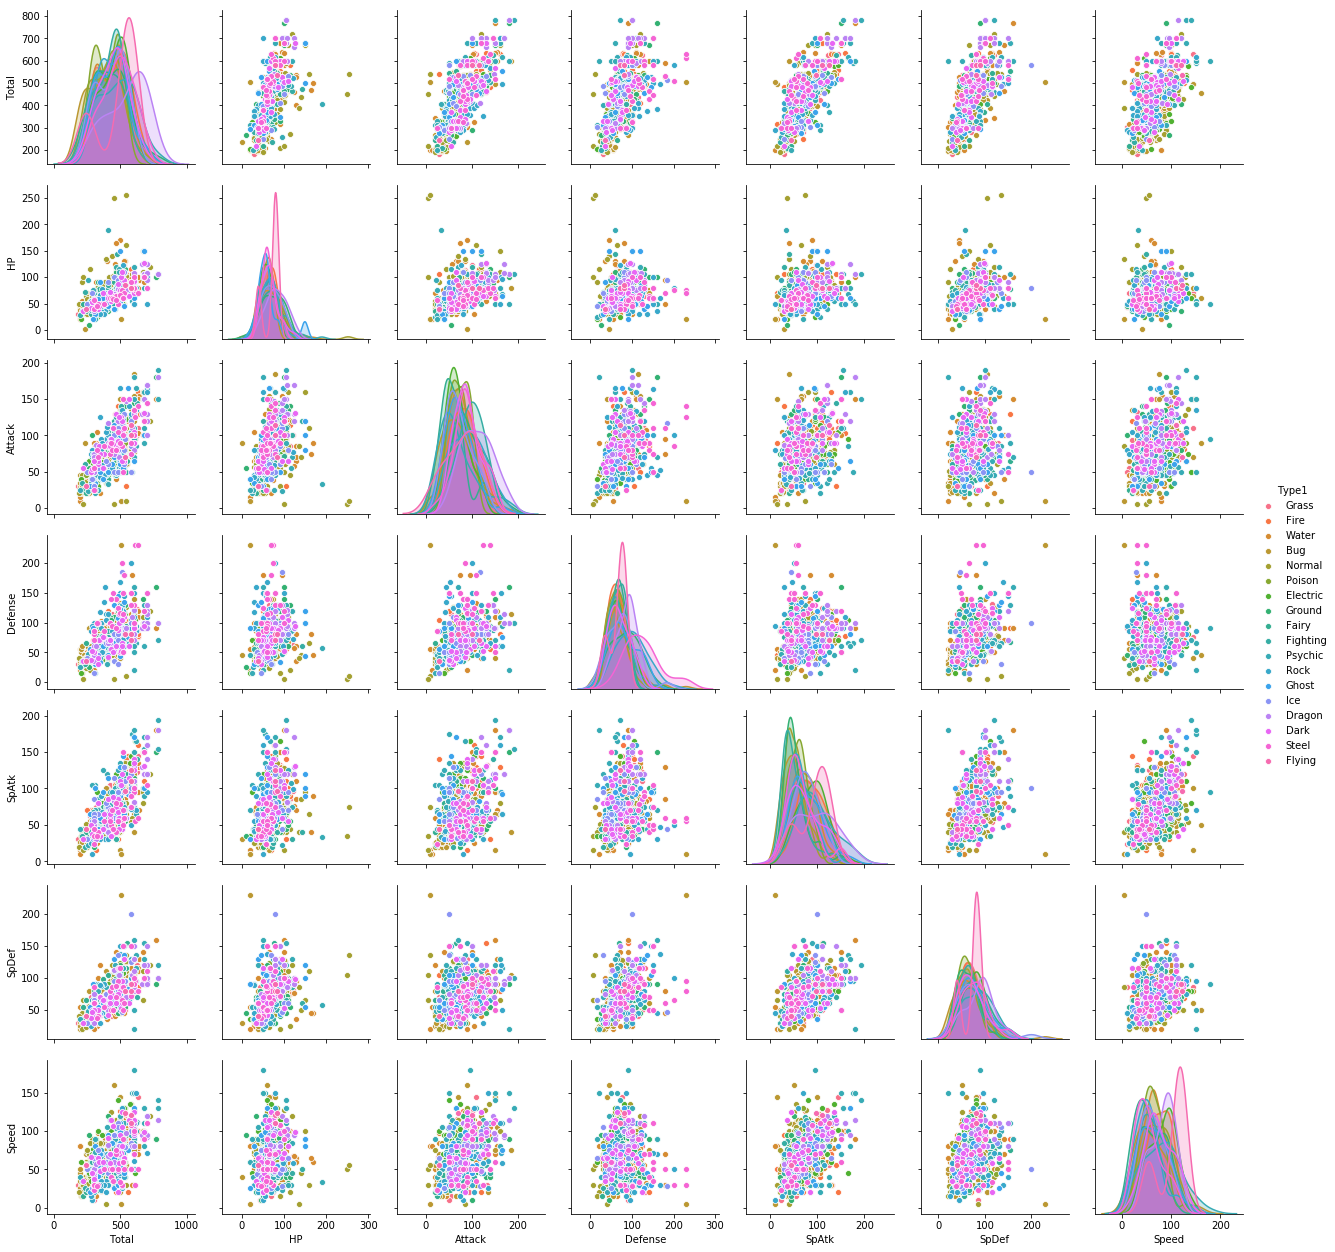

In [21]:
pokemon_wykres_type1 = pokemon.drop(["Generation", "Legendary"],axis = 1)
sns.pairplot(pokemon_wykres_type1, kind="scatter", hue="Type1")
plt.show()

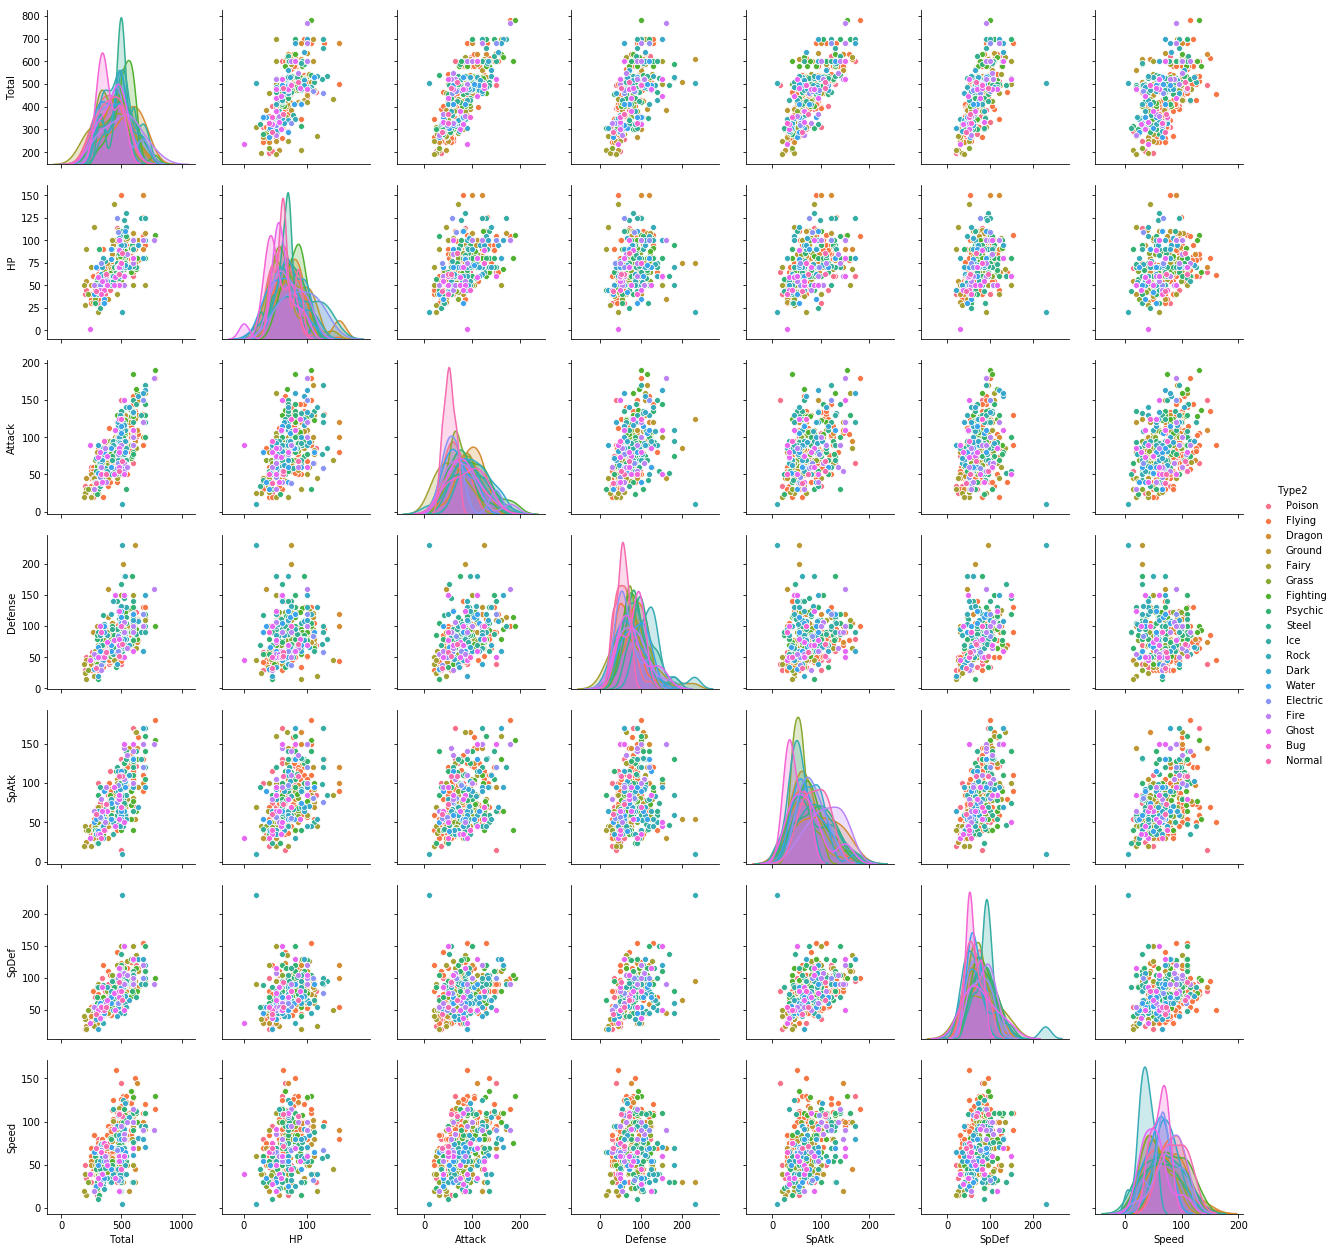

In [22]:
pokemon_wykres_type2 = pokemon_wykres_type1.dropna(axis = 0, how="any")
sns.pairplot(pokemon_wykres_type2, kind="scatter", hue="Type2")
plt.show()

Dla każdego typu nowy wykres korelacji. Możliwe, że statystyki będą bardziej skorelowane w obrębie typów niż ogółu. Dodatkowo wykresy będą czytelniejsze niż gdy wszystkie typy są na jednym wykresie.
Po dodaniu `hue="Type1"` otrzymamy korelacje dla pokemonów posiadających też 2 typy, więc pojawią się na każdym wykresie możliwe kombinacje do obecnie badanego typu. Bez `hue` warto użyć `print(typ)` przed każdym wykresem

Grass


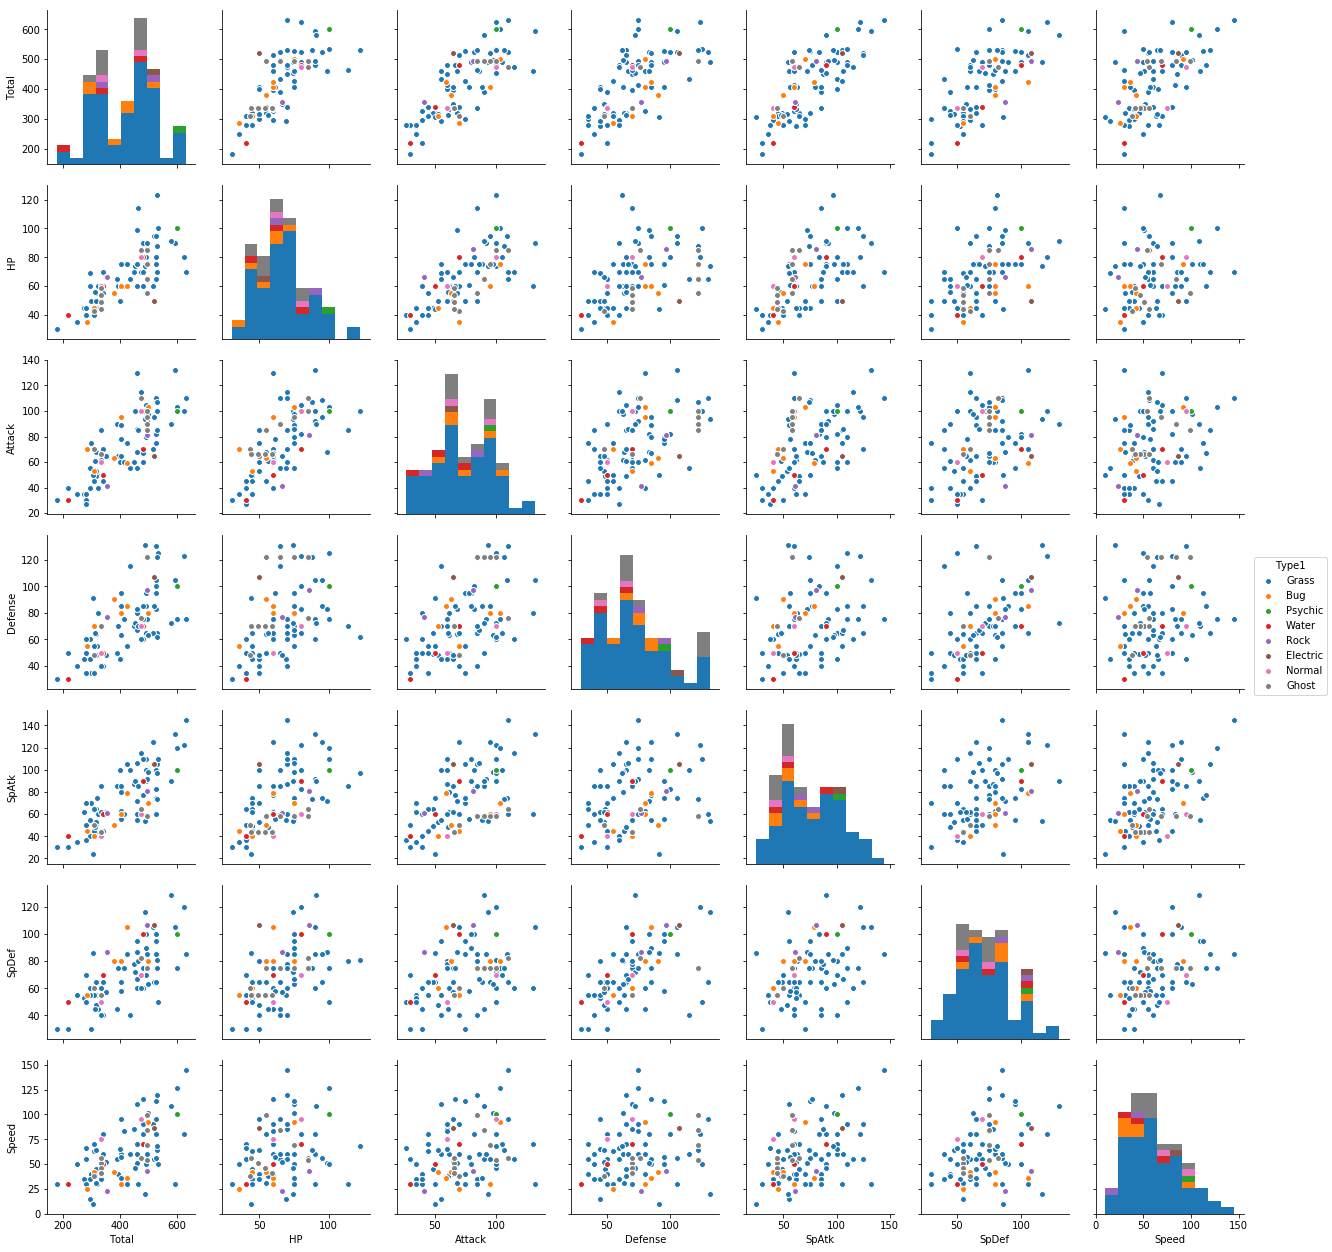

Fire


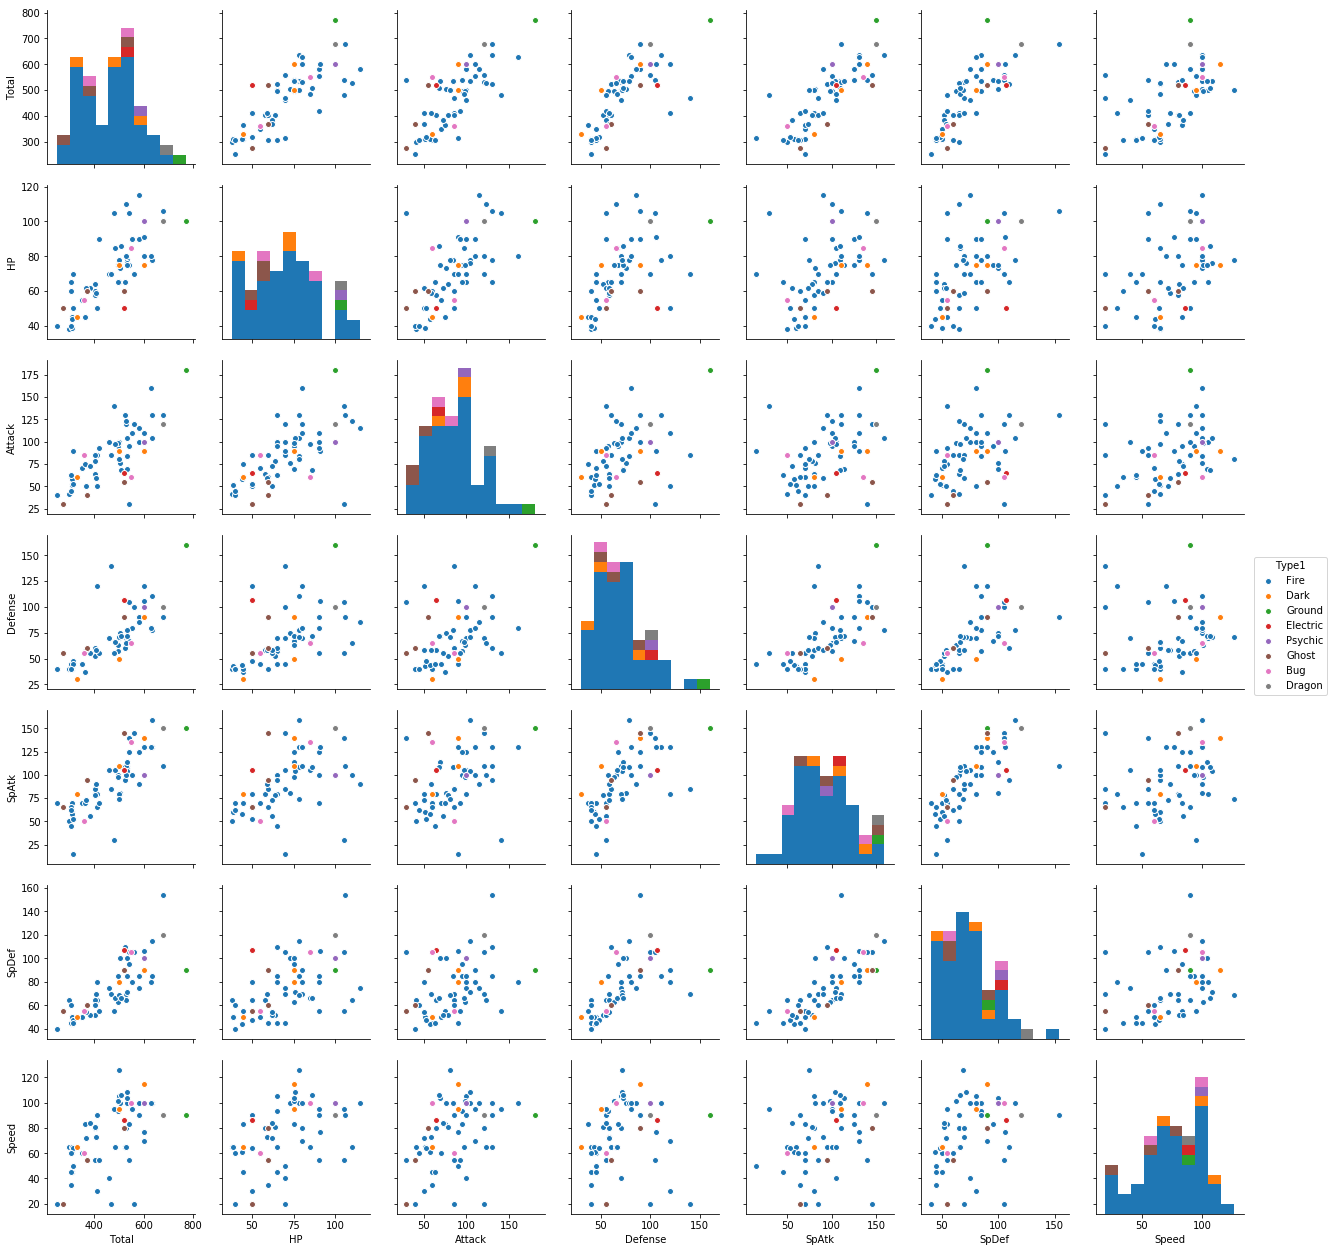

Water


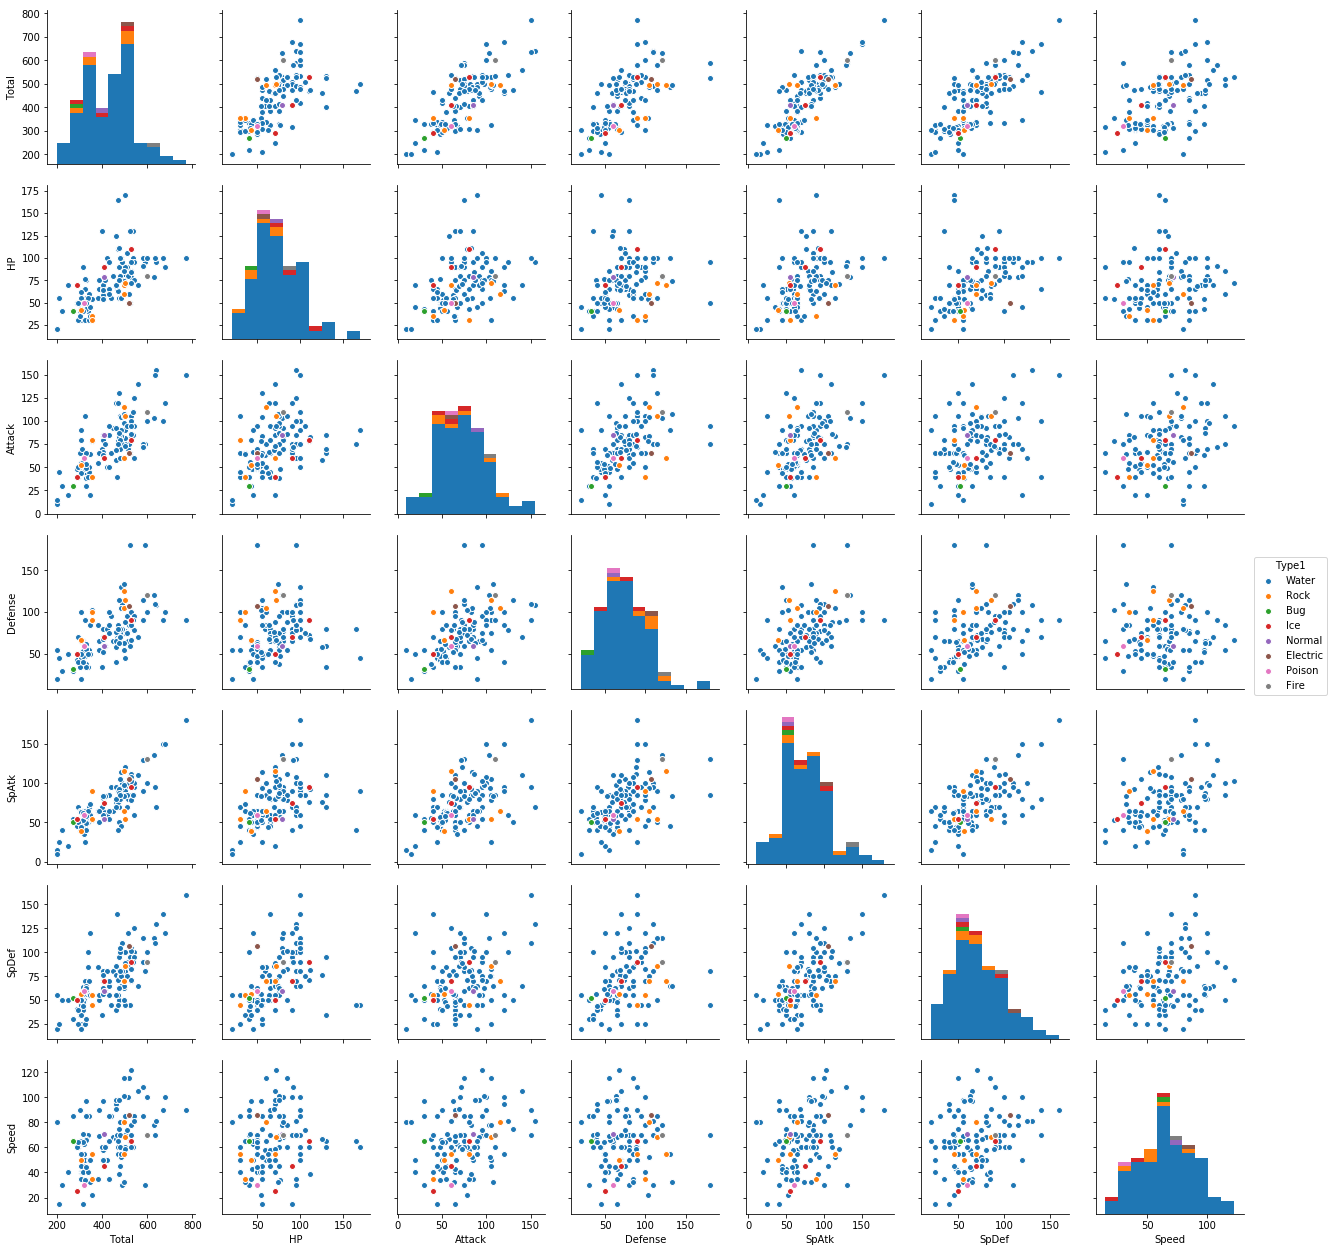

Bug


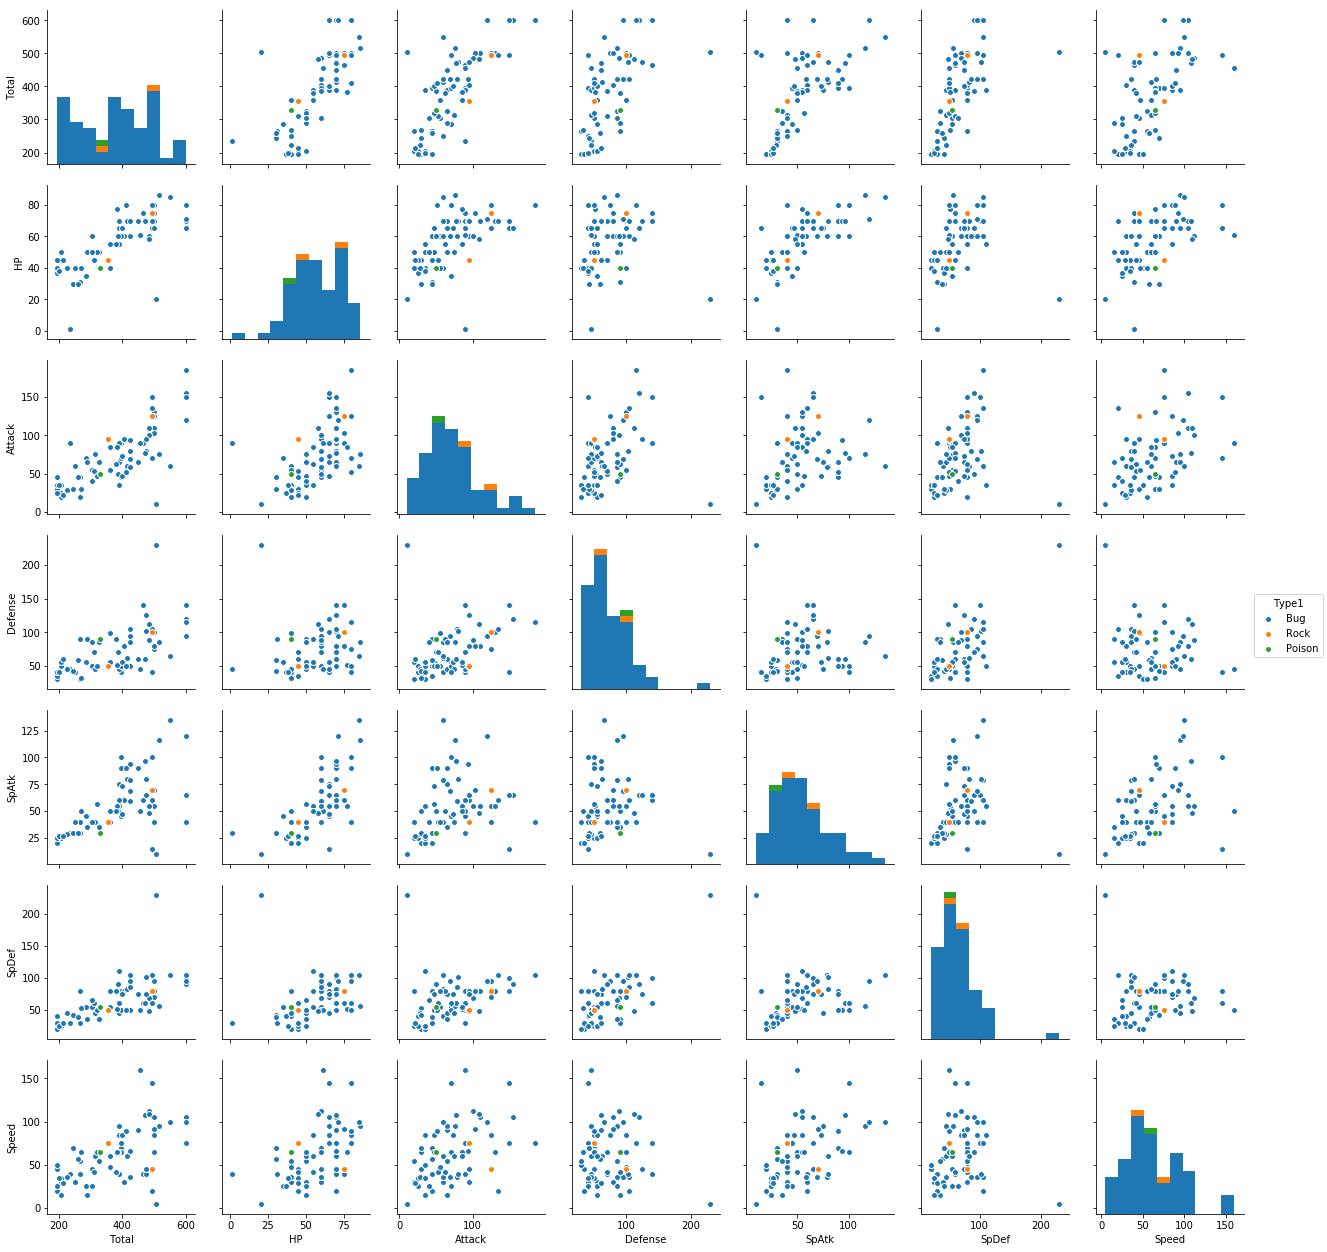

Normal


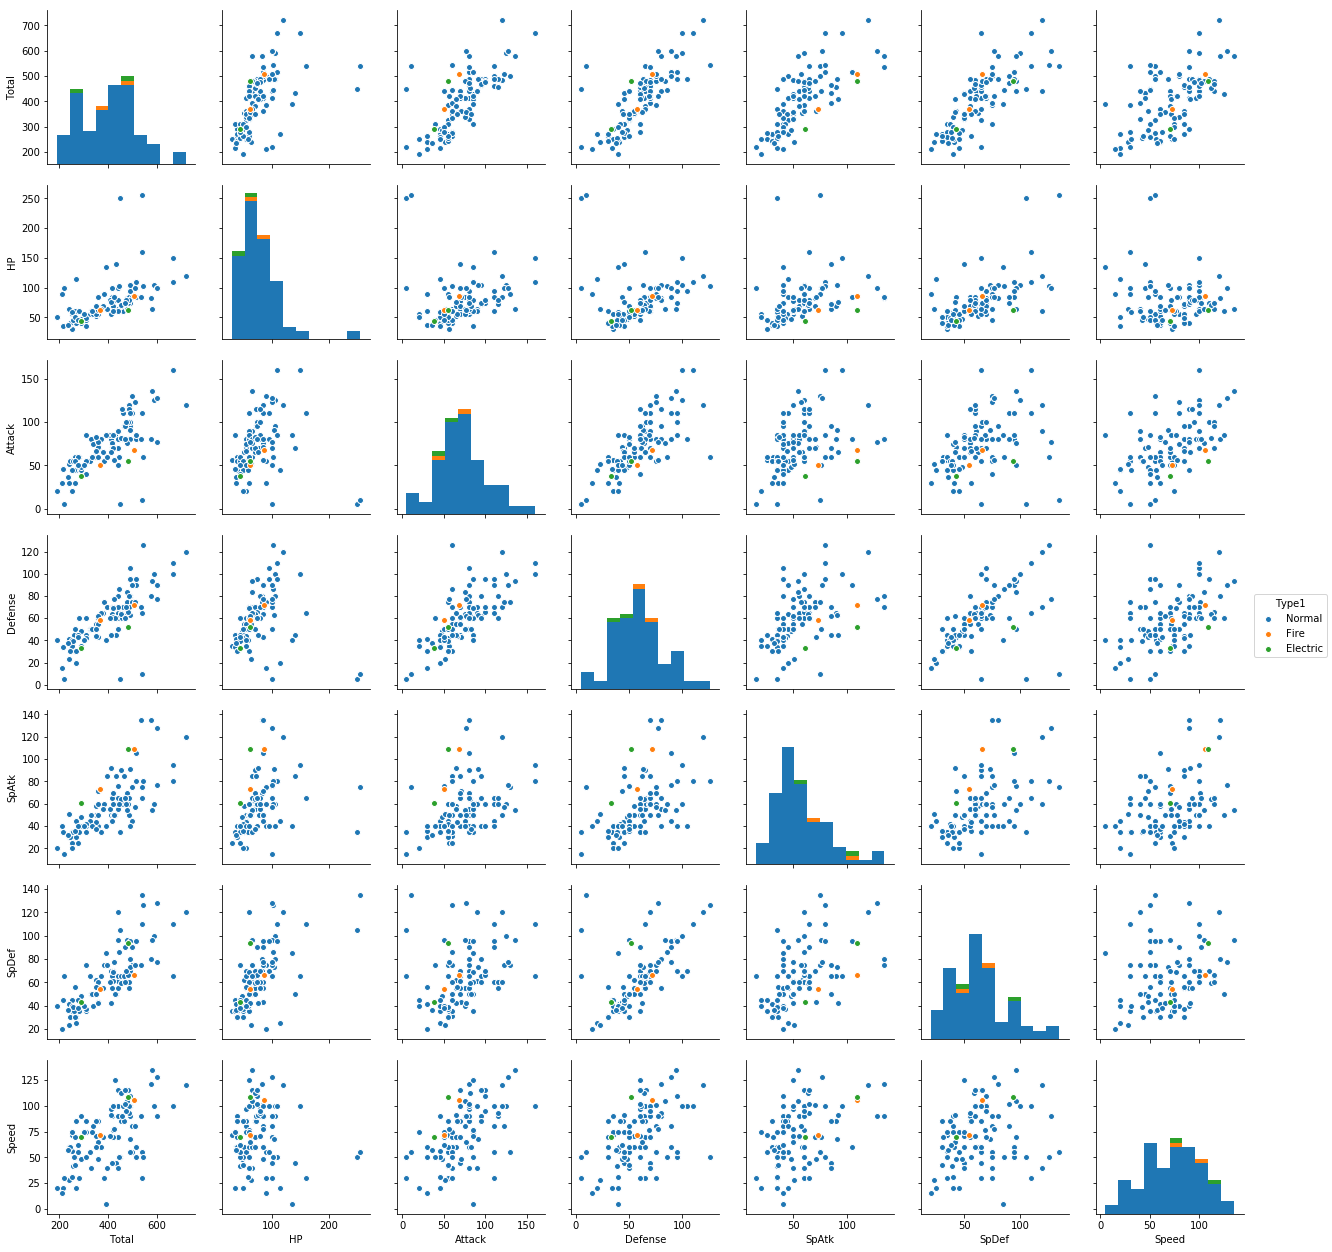

Poison


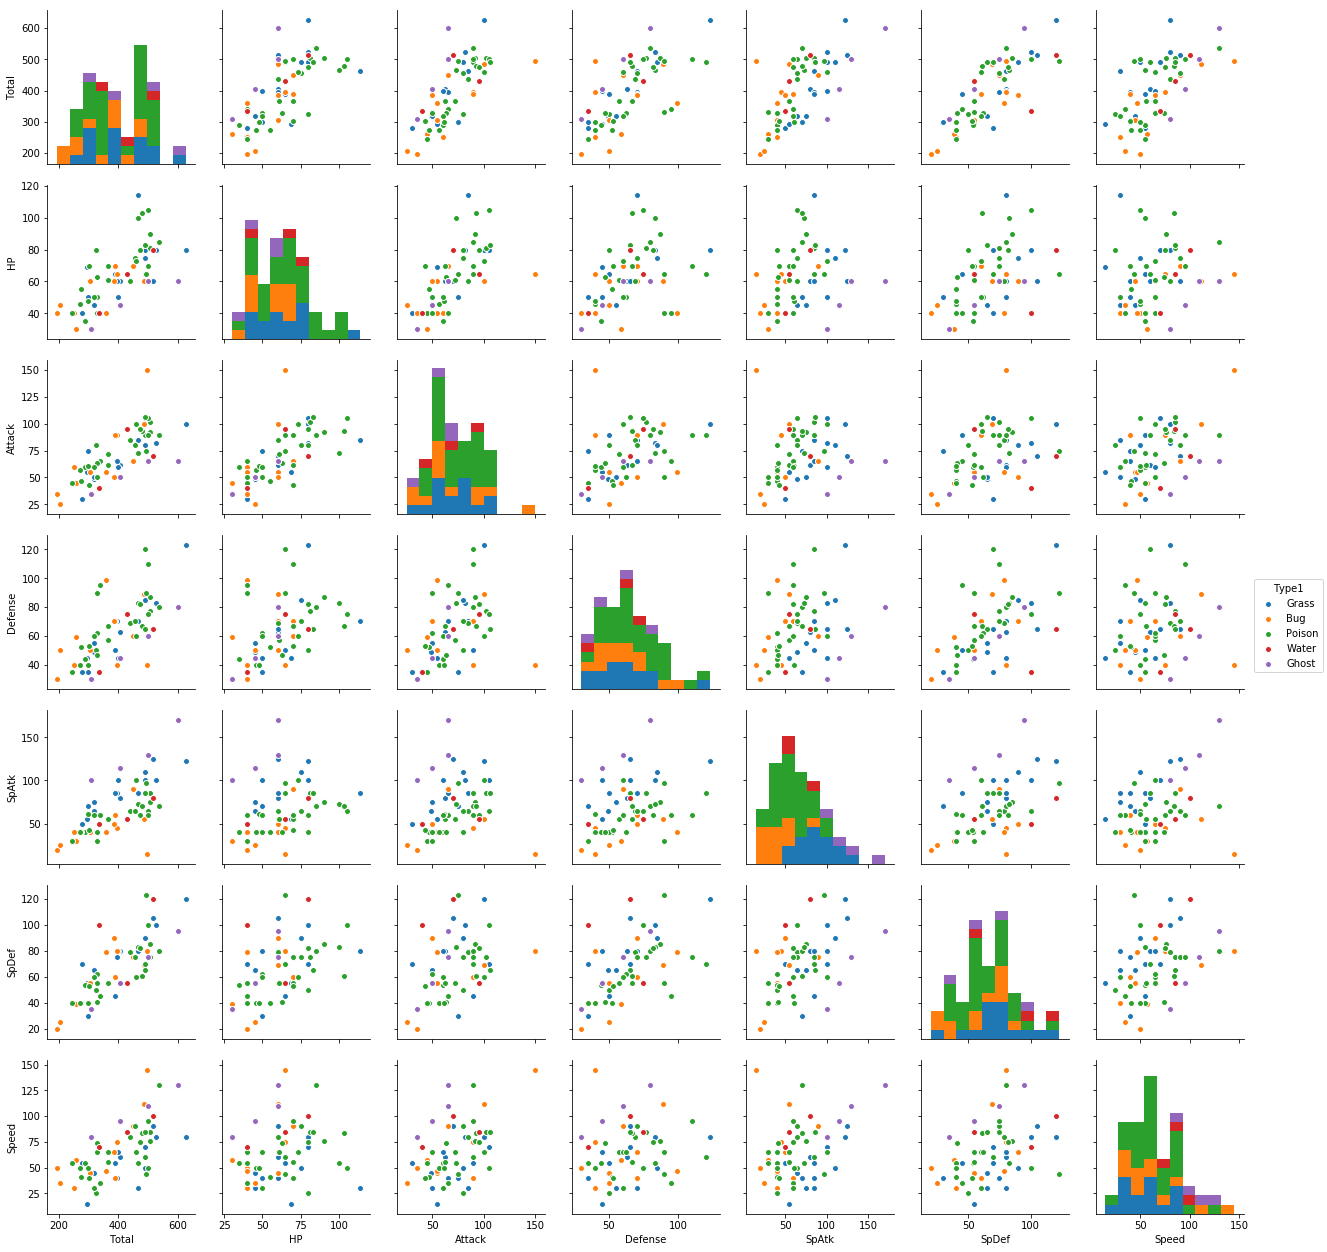

Electric


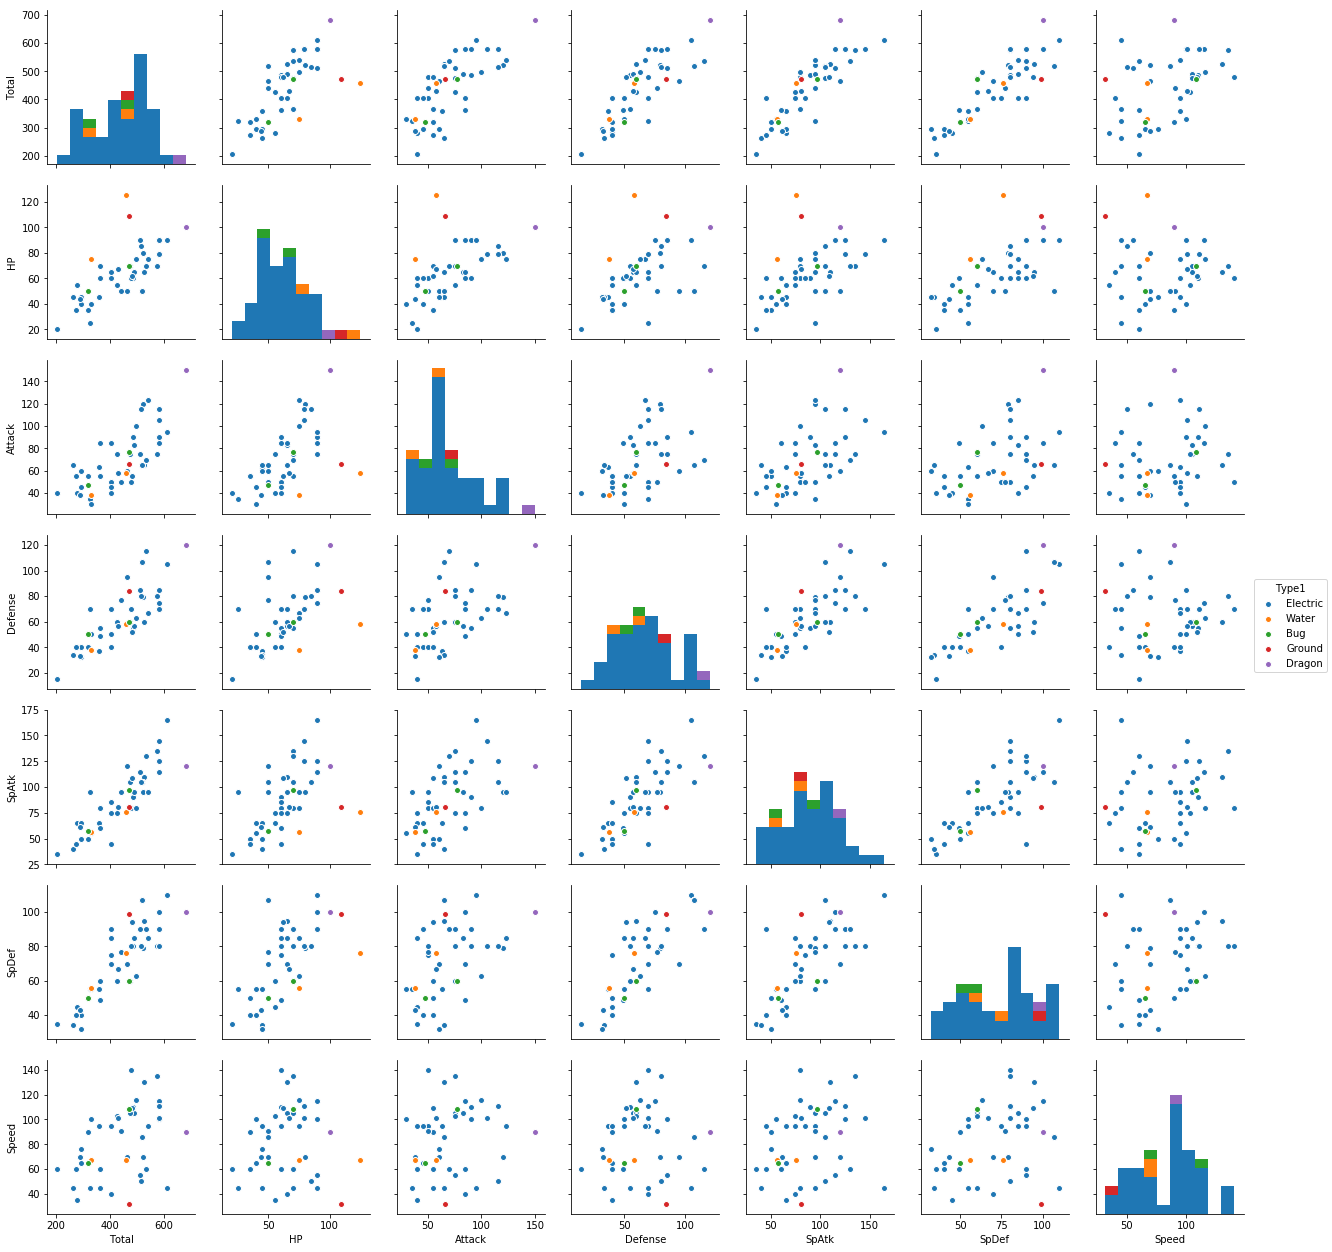

Ground


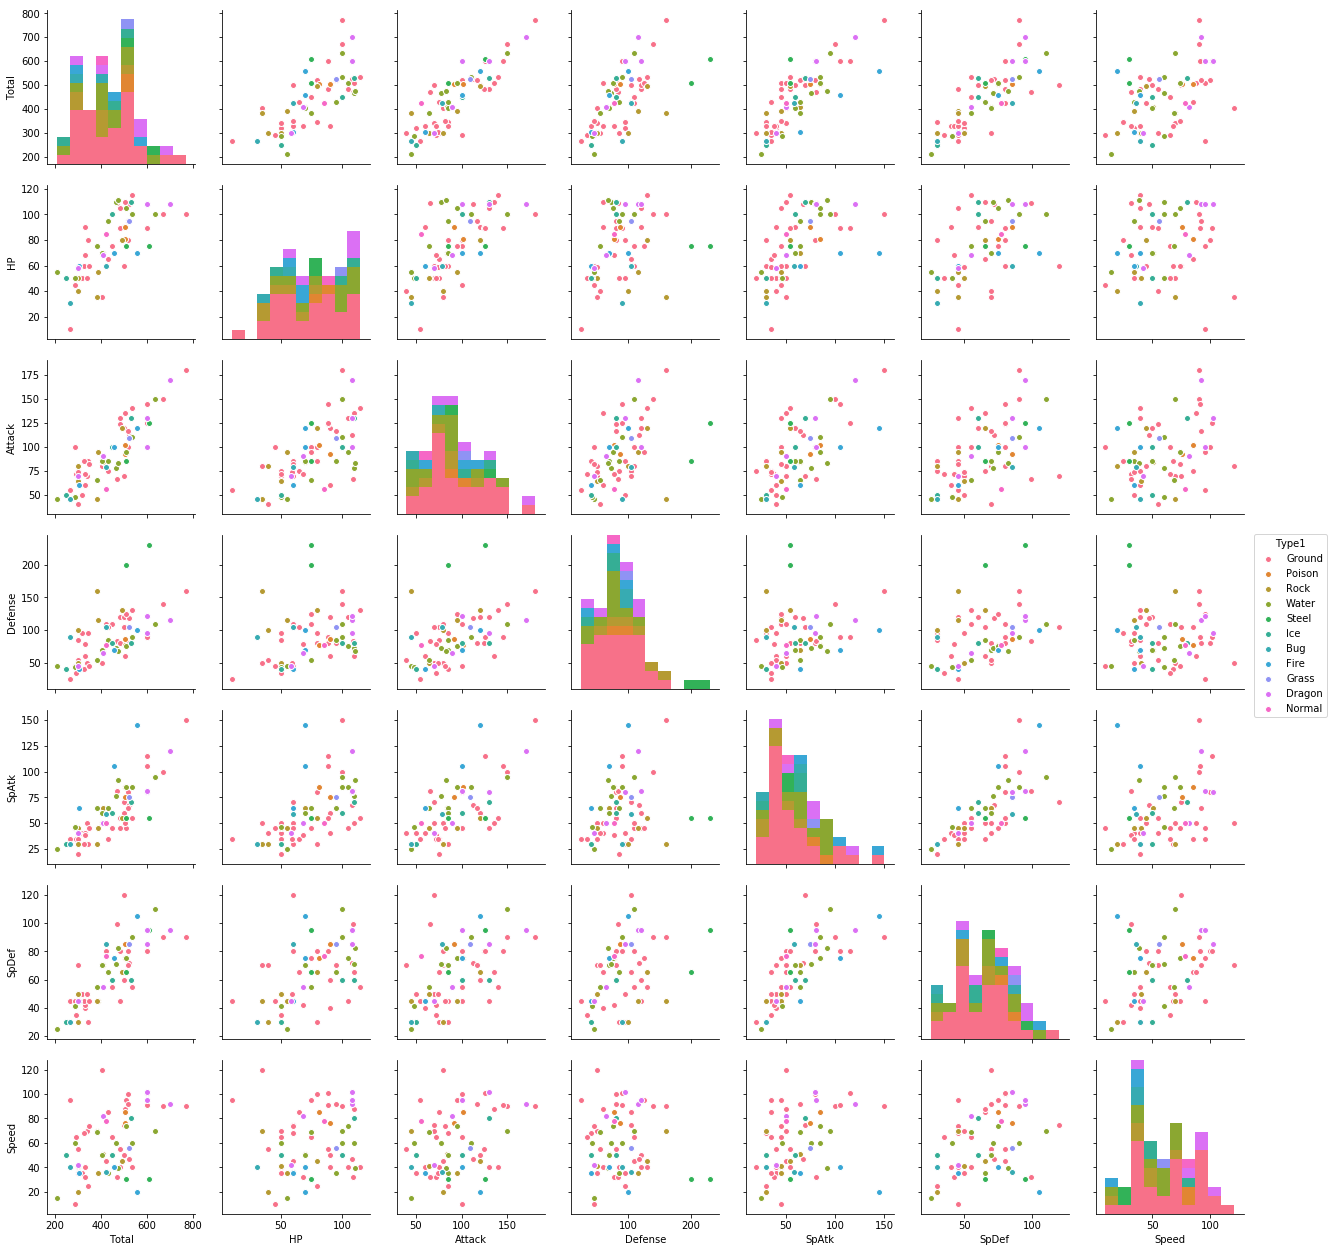

Fairy


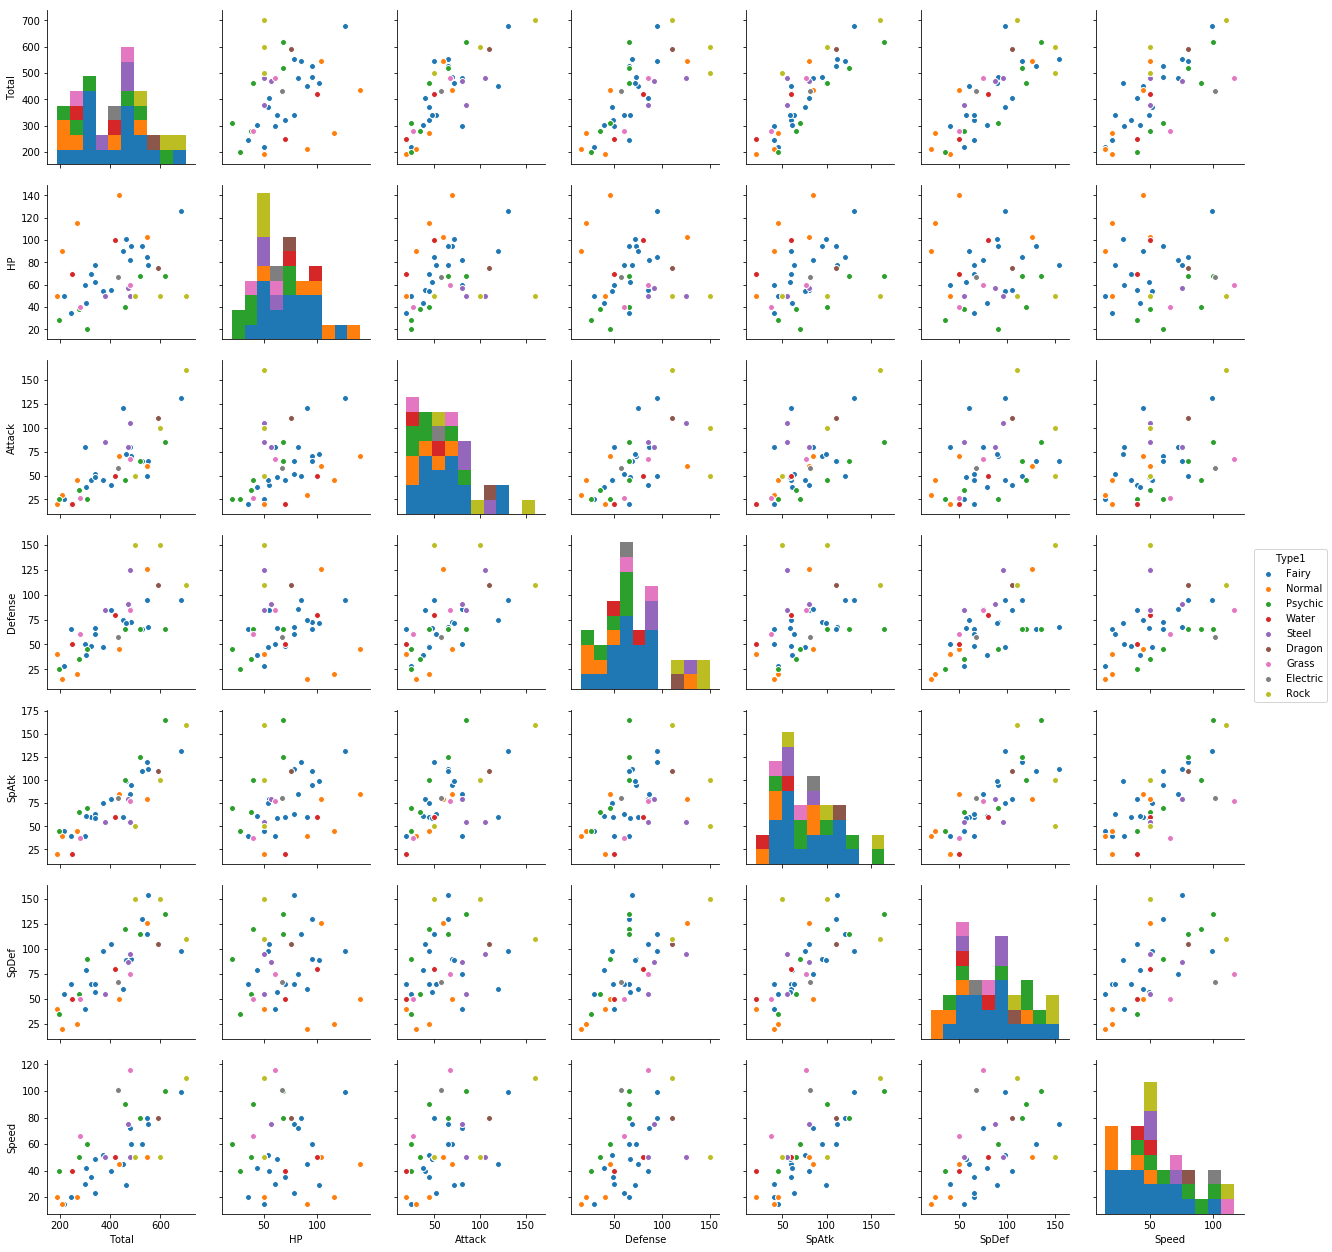

Fighting


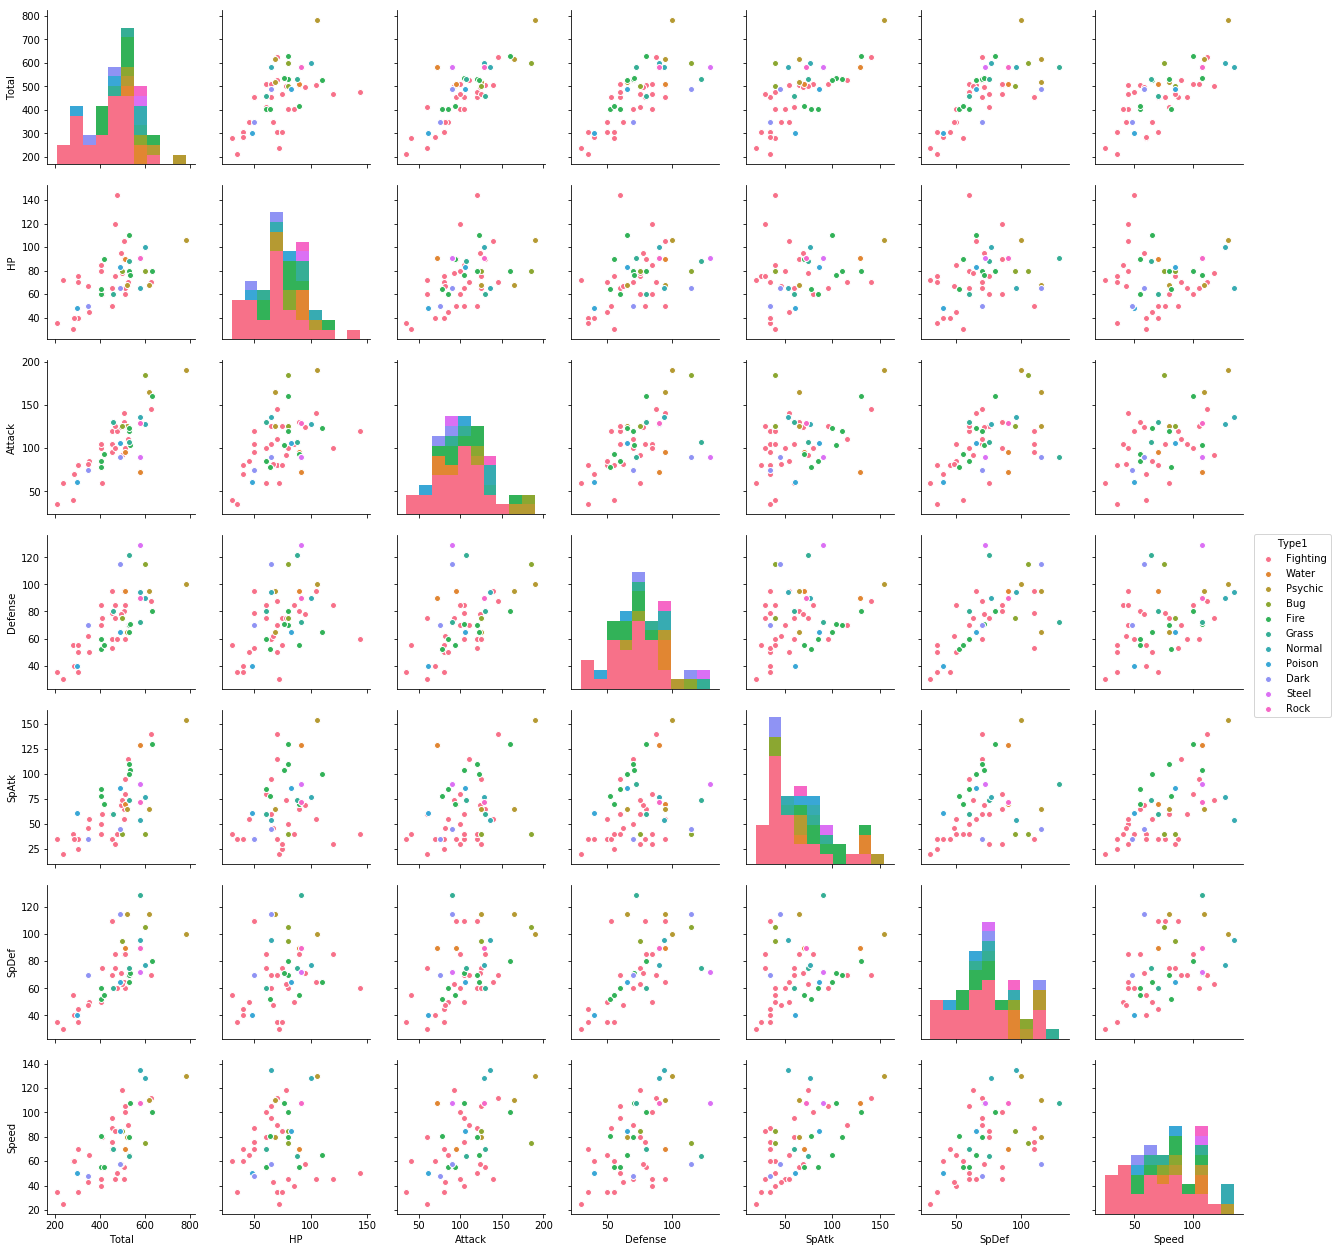

Psychic


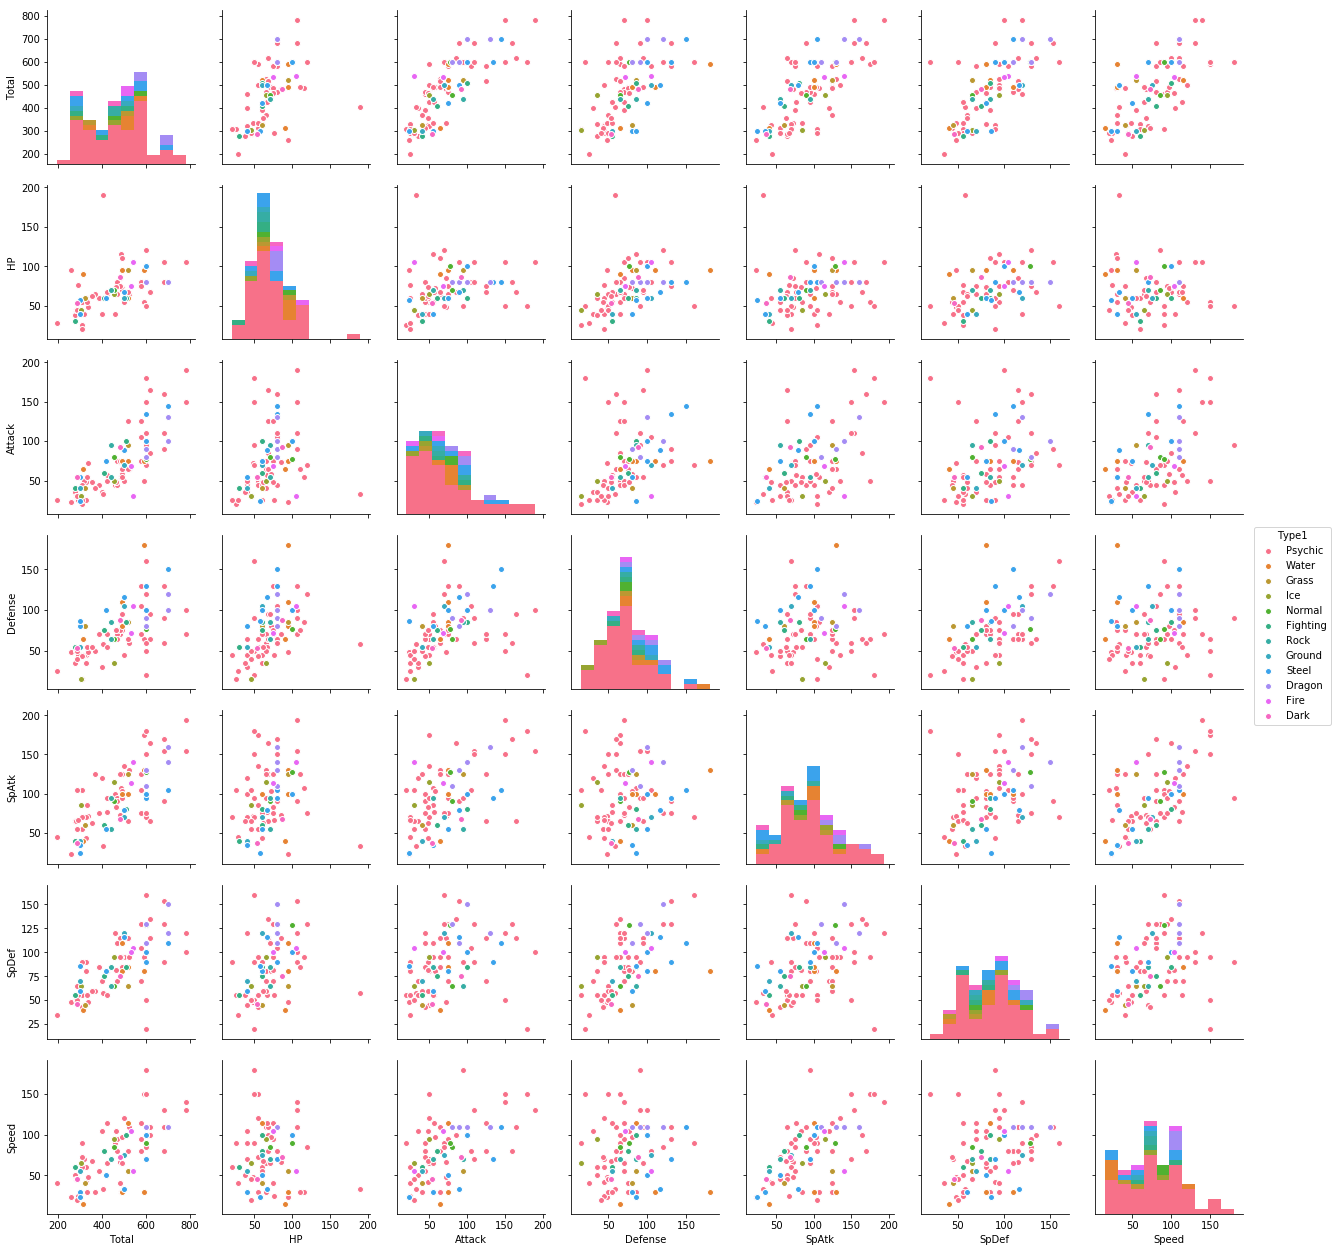

Rock


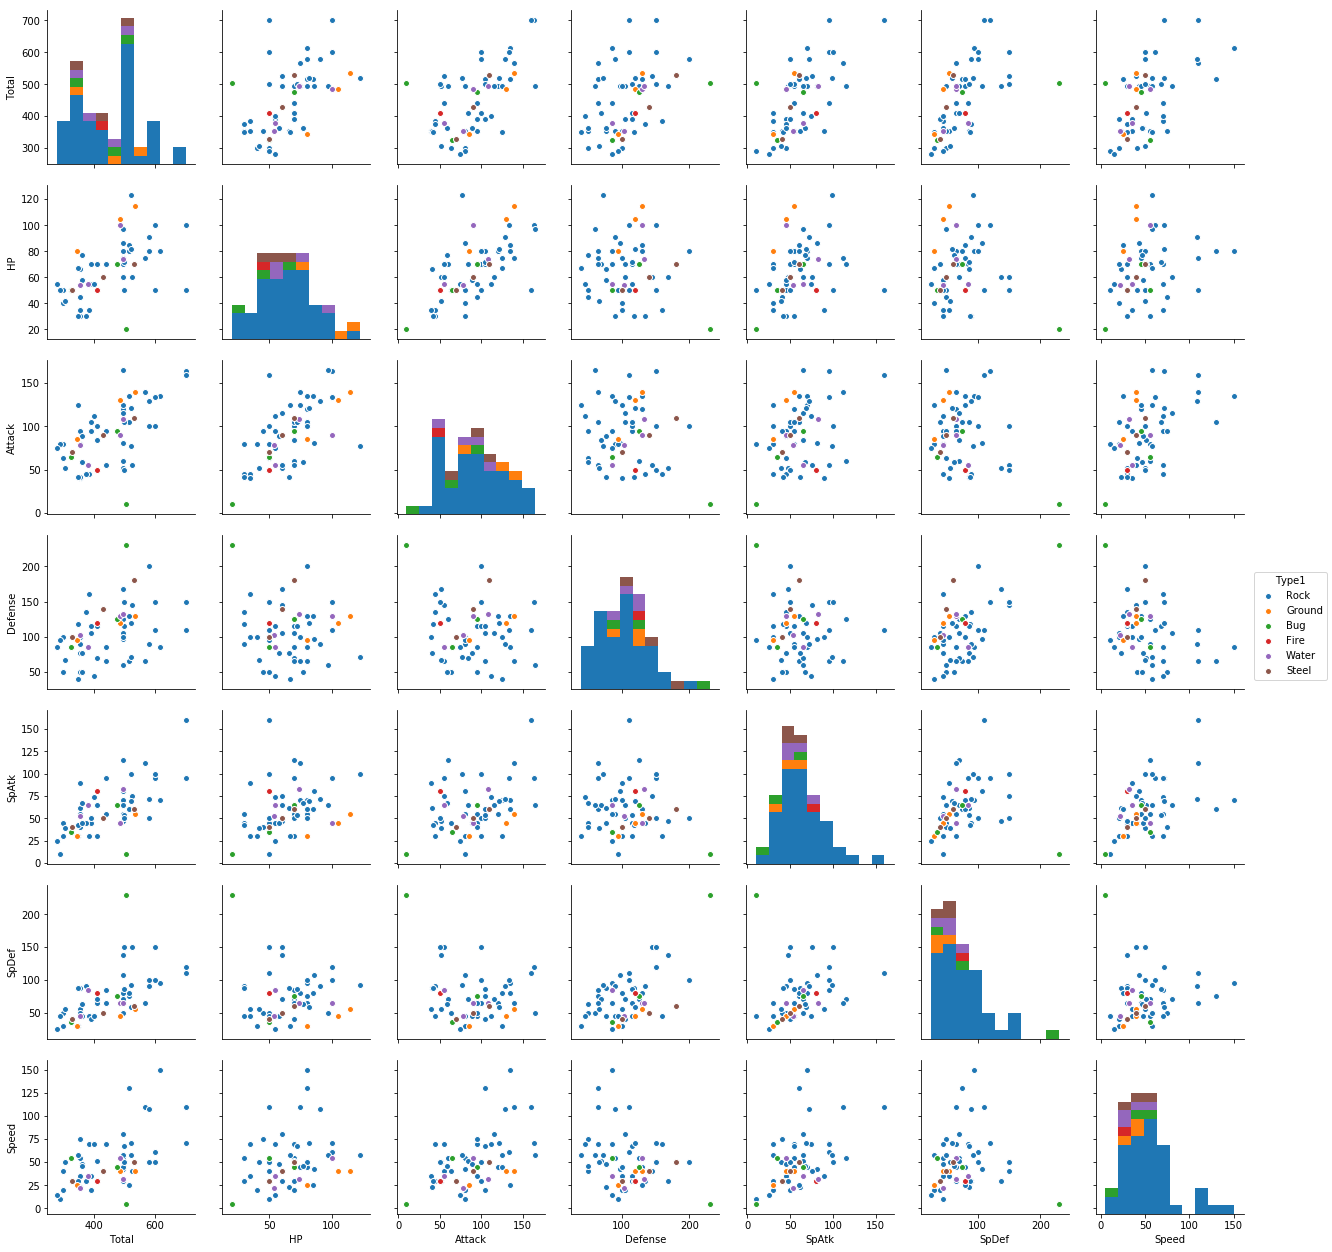

Ghost


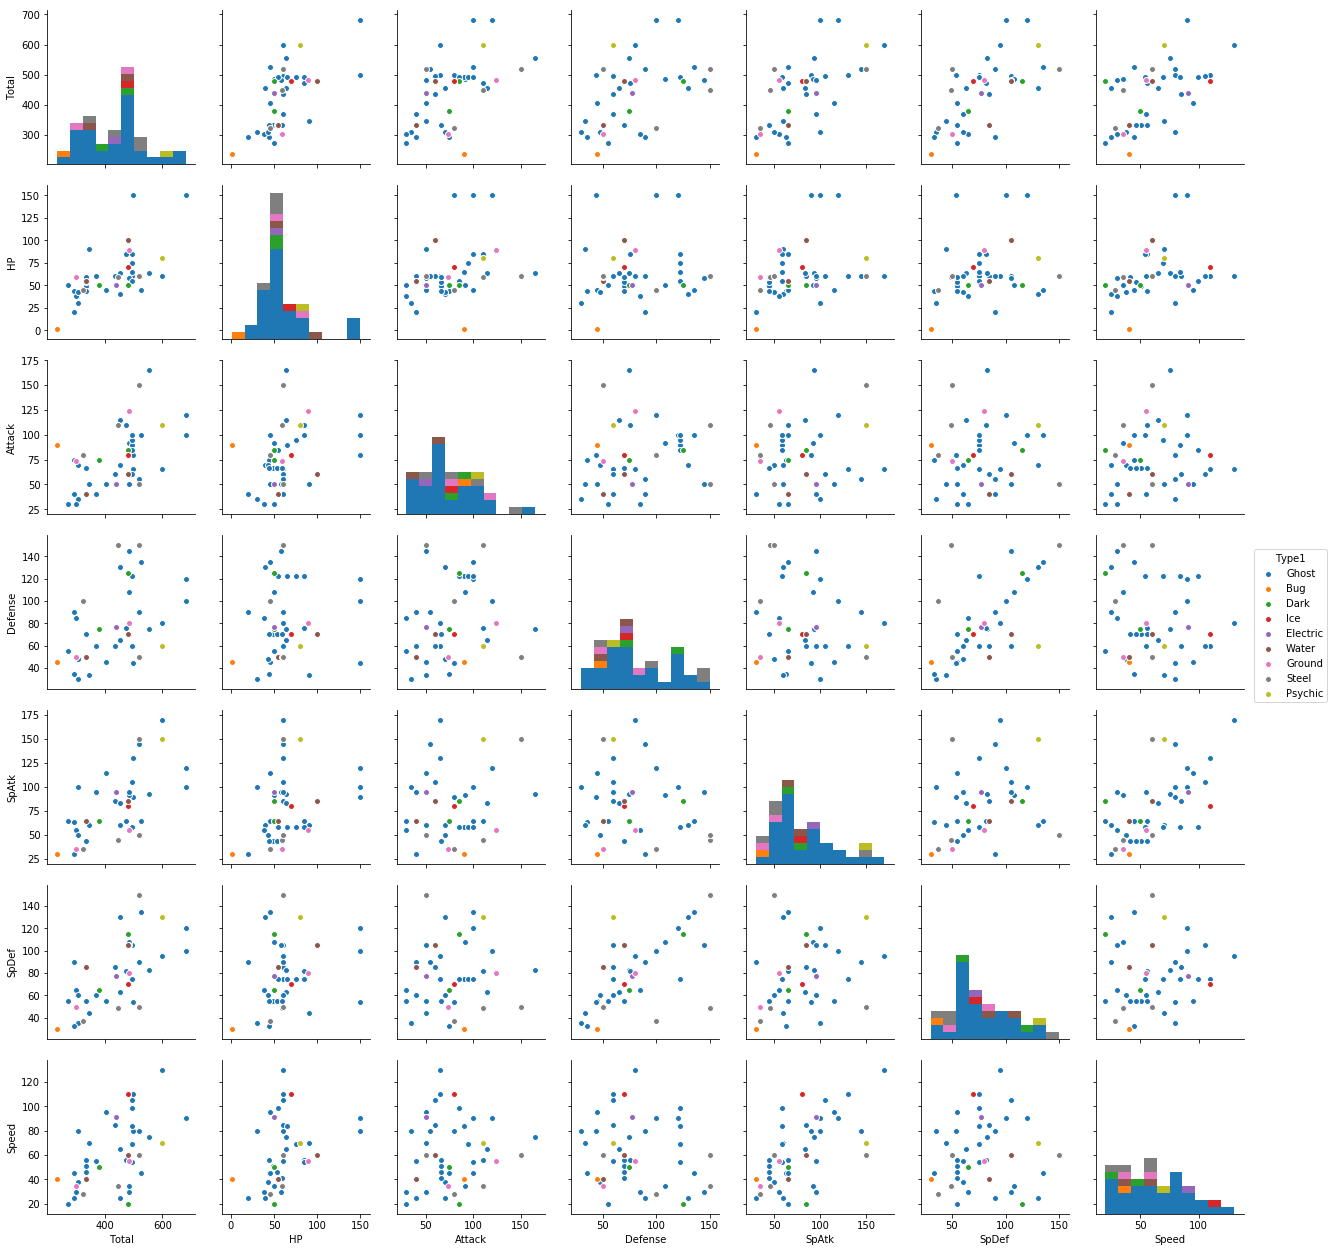

Ice


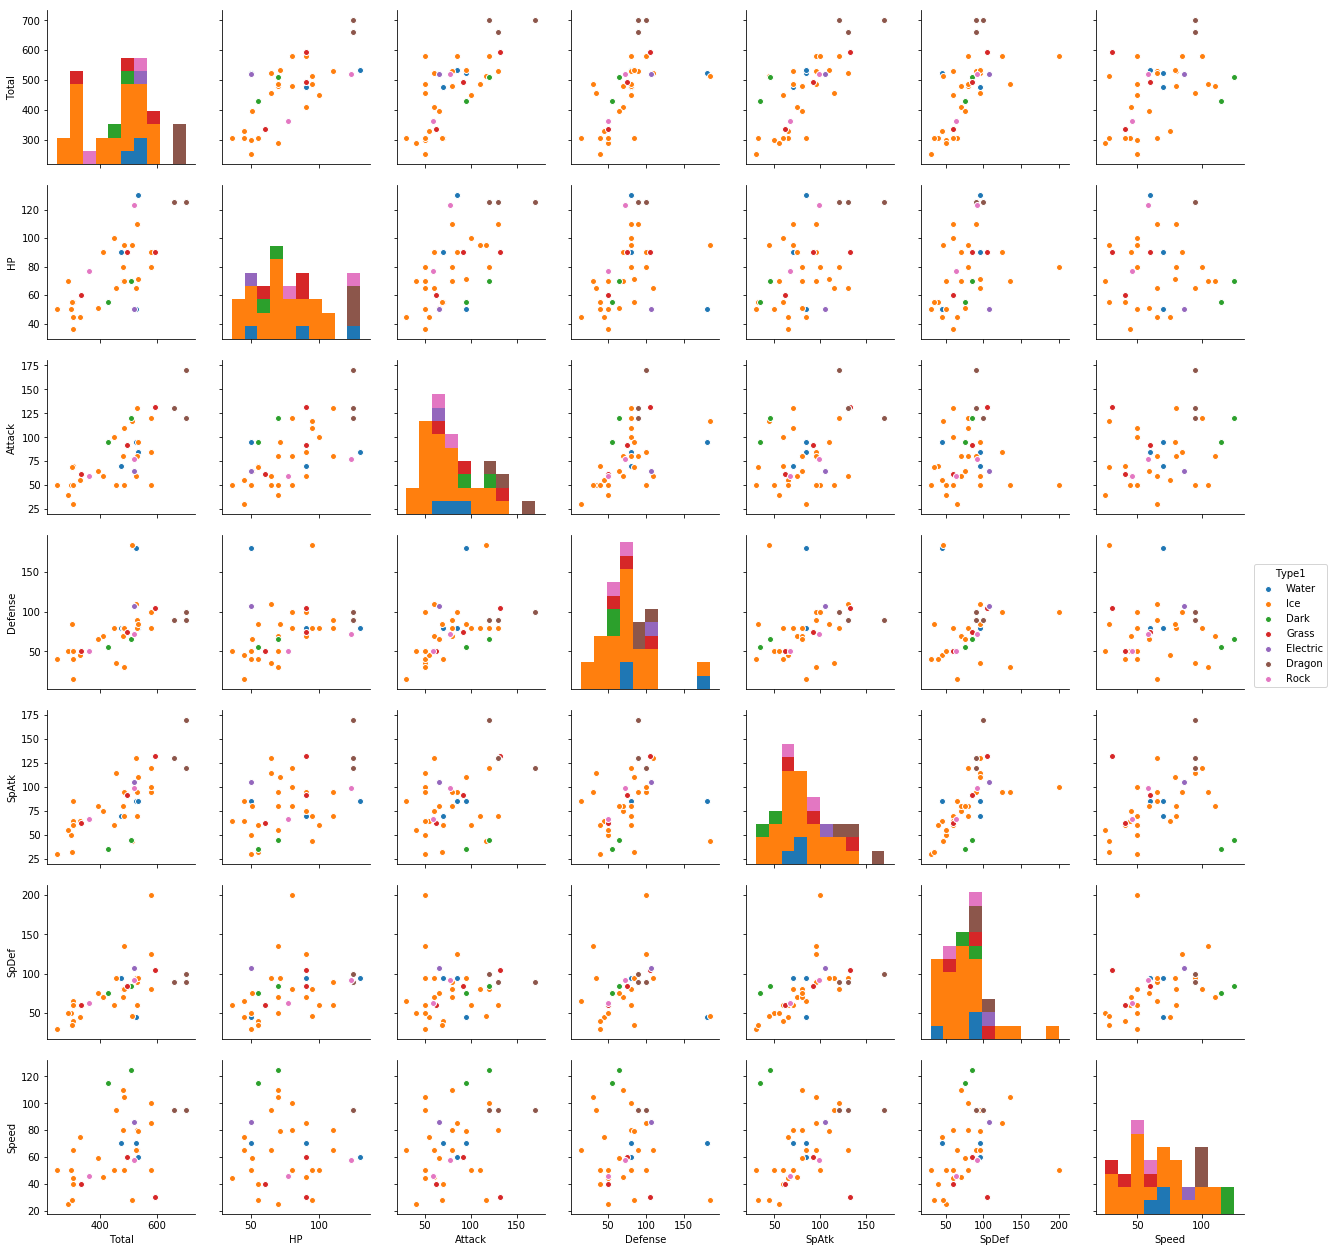

Dragon


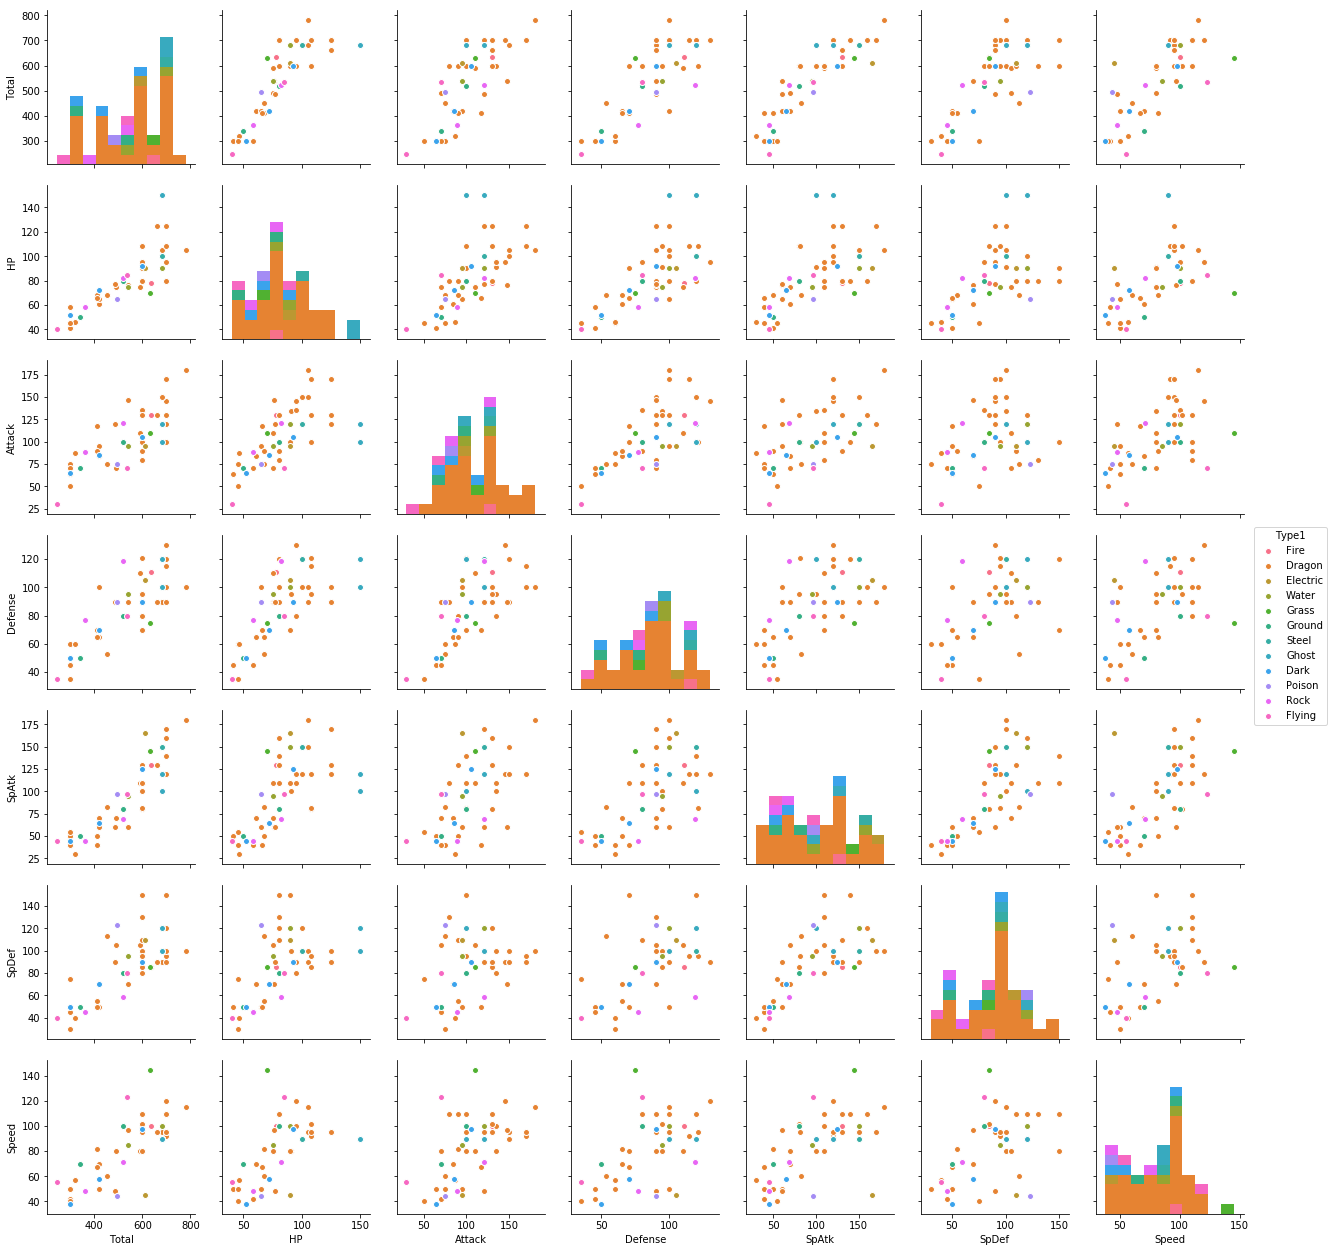

Dark


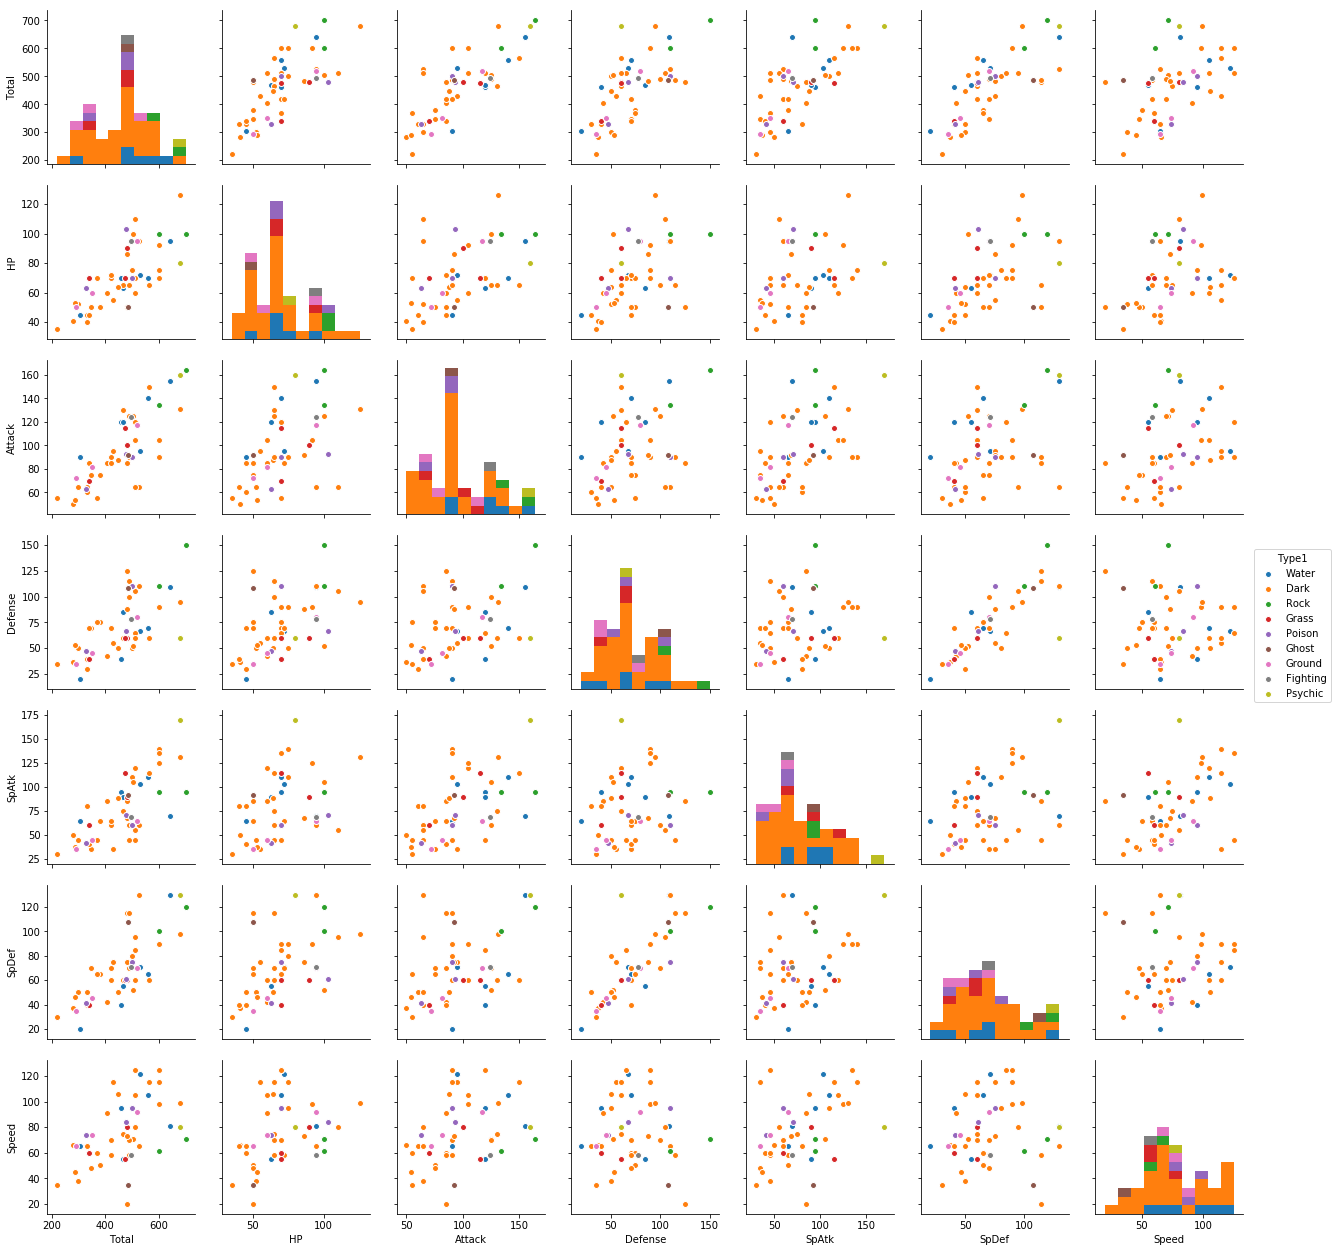

Steel


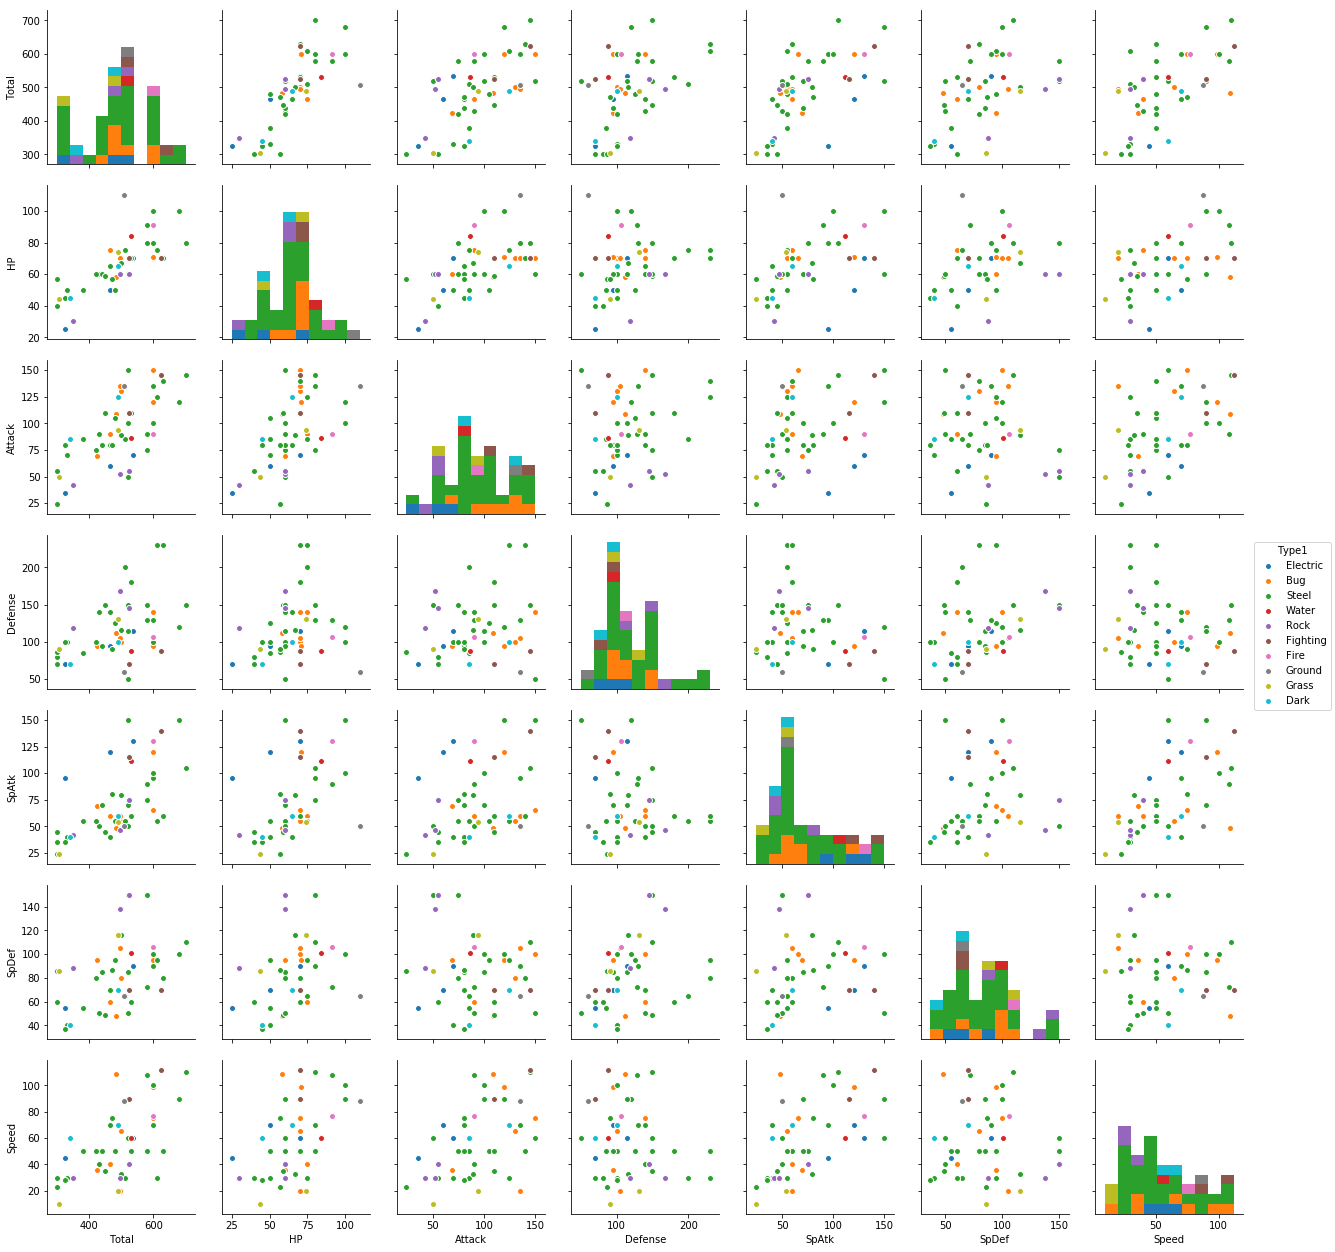

Flying


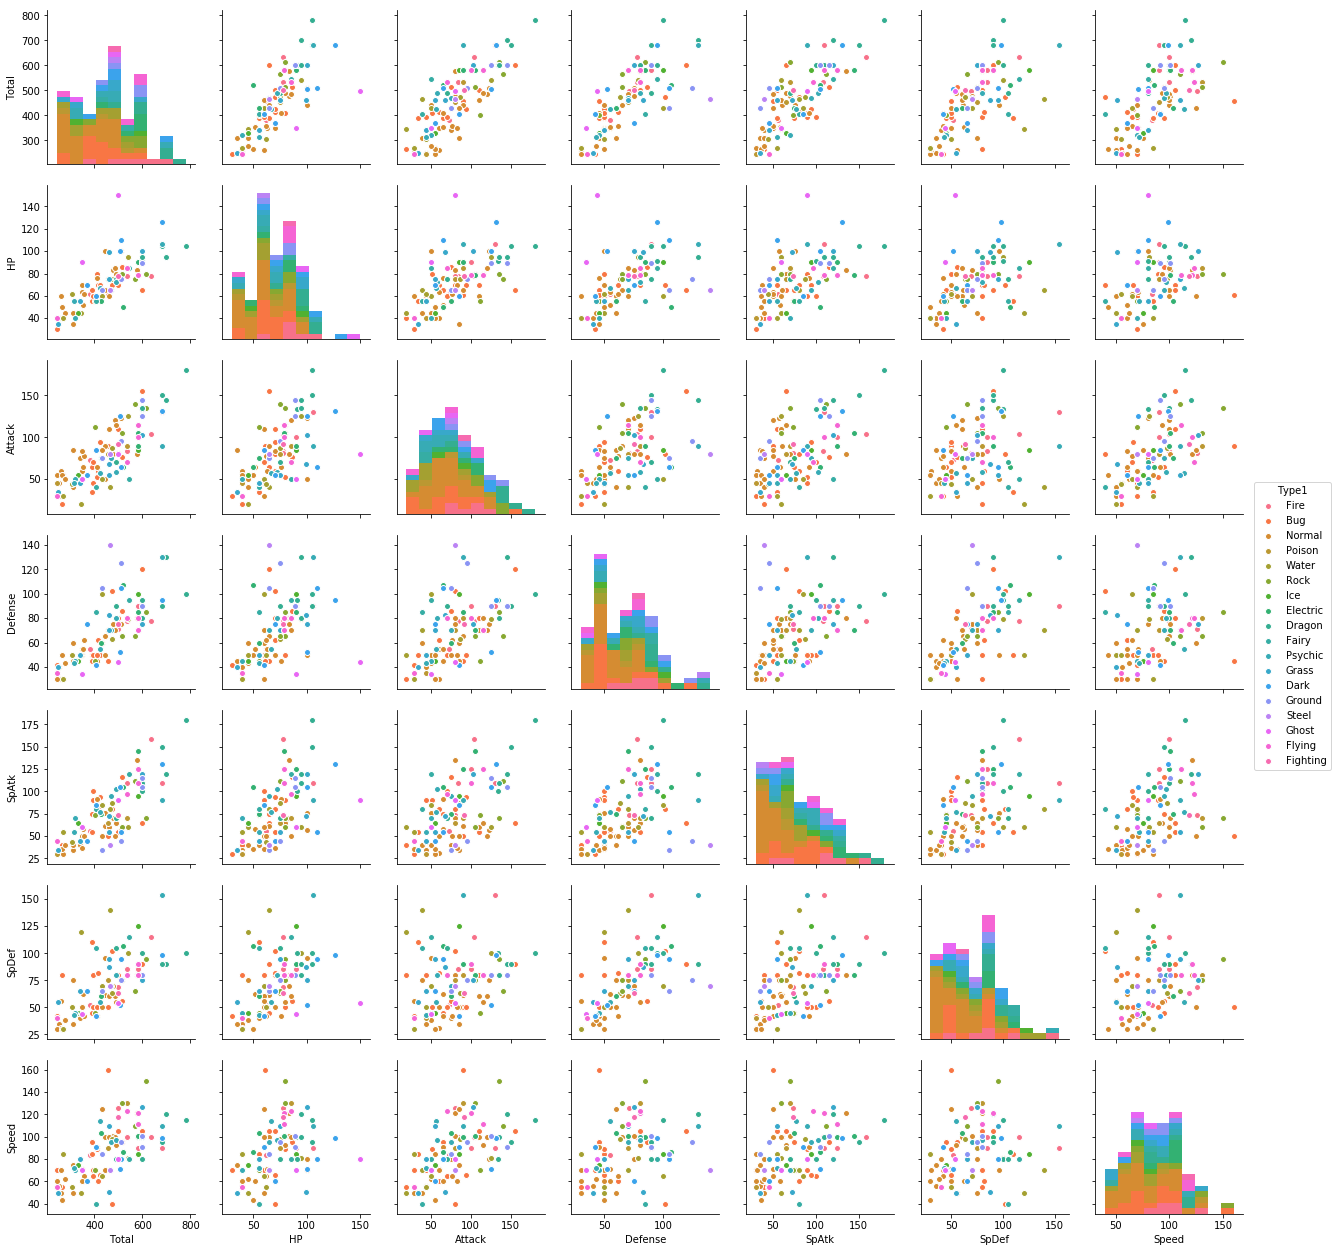

In [10]:
pokemon_corr_by_type = pokemon_wykres_type1.copy()
for typ in dostepne_typy:
    print(typ)
    sns.pairplot(pokemon_corr_by_type[(pokemon_corr_by_type.Type1 == typ) | (pokemon_corr_by_type.Type2 == typ)], 
                 kind="scatter", hue="Type1")
    plt.show()

Z wykresów korelacji dla poszczególnych typów trudniej jest wybrać skorelowane pary statystyk. Przykładowo dla typu `Grass` można wyróżnić parę HP i Attack. Wskazana para pokrywa się z parą najlepiej skorelowaną dla tego typu pokemonów w przypadku macierzy korelacji. Można więc wnioskować, że w przypadku zbioru Pokemonów lepiej jest wykorzystać macierz korelacji niż przyglądać się wykresom, przy których często można mieć wątpliwości, która para jest lepsza. Jednak po analizie pary powinny się pokrywać, jak w przytoczonym przykładzie.

# Uczenie nienadzorowane

`Importy` do następnej części projektu.

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster, single
from sklearn.cluster import AgglomerativeClustering
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Grupowanie aglomeracyjne

TypWygenerowany  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  \
Type1                                                                         
Bug              10   8   0   2   4   8   2   2   2   0   6   5   0   0   0   
Dark              5   1   1   0   0   2   1   2   0   2   4   1   0   0   0   
Dragon            1   0  10   0   5   1   0   1   0   2   0   0   1   0   0   
Electric          1   1   0   0   0   2   7   0   2   3   0   0   0   0   1   
Fairy             0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
Fighting          0   1   0   0   1   0   0   0   1   0   3   0   0   0   0   
Fire              1   0   1   0   4   5   4   0   0   2   2   1   0   0   1   
Flying            0   1   0   0   0   0   1   0   0   0   0   0   0   0   0   
Ghost             8   0   2   2   0   2   2   1   0   1   4   0   0   0   0   
Grass             9   3   0   1   1   4   2   1   2   3   8   0   0   0   1   
Ground            6   0   0   2   2   0   0   1   1 

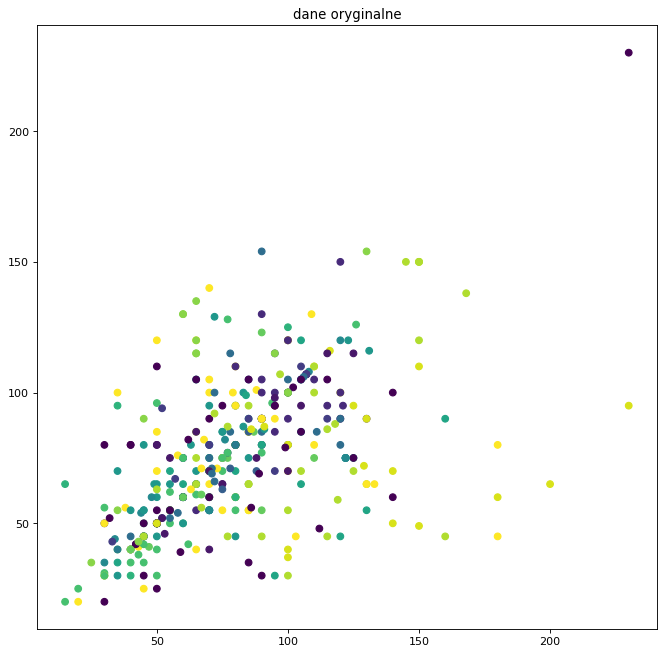

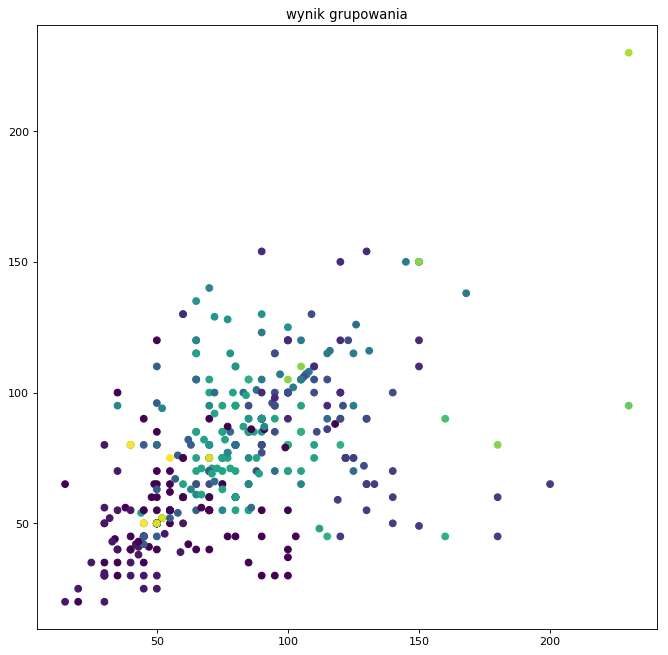

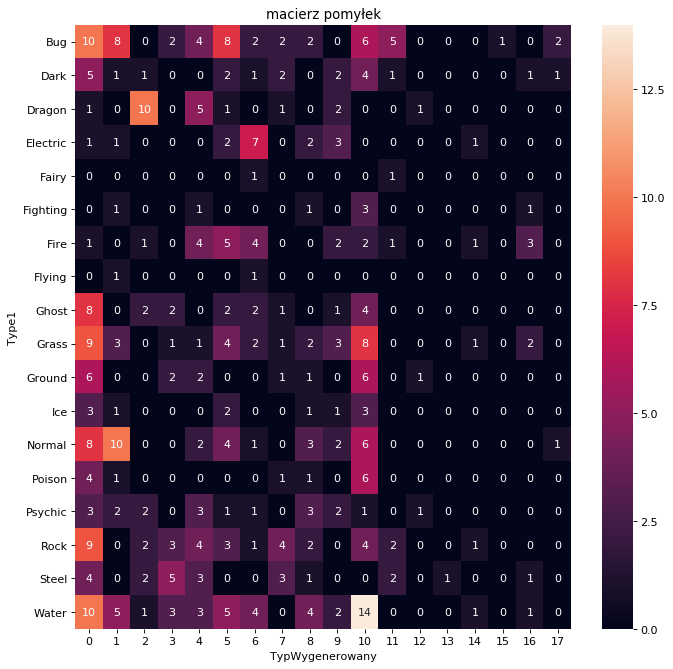

In [14]:
pokemon_bez_klas = pokemon_bez_nan.drop(columns = ['Type1', 'Type2', 'Generation', 'Legendary'])

model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=dostepne_typy.size)
model.fit(pokemon_bez_klas)
klasa = pokemon_bez_nan['Type1'].astype('category').cat.codes
grupa = model.labels_

plt.figure(figsize=(10,10), dpi=80)
plt.plot()
plt.scatter( x=pokemon_bez_nan['Defense'], y=pokemon_bez_nan['SpDef'], c=klasa)
plt.title('dane oryginalne')
plt.figure(figsize=(10,10), dpi=80)
plt.plot()
pokemon_bez_klas['TypWygenerowany']=  model.labels_
plt.scatter( x=pokemon_bez_klas['Defense'], y=pokemon_bez_klas['SpDef'], c=grupa)
plt.title('wynik grupowania')
plt.figure(figsize=(10,10), dpi=80)
plt.plot()
pomylki = pd.crosstab(pokemon_bez_nan['Type1'],pokemon_bez_klas['TypWygenerowany'])
print(pomylki)
sns.heatmap(pomylki,annot = pomylki)
plt.title('macierz pomyłek')

pokemon_bez_klas = pokemon_bez_klas.drop(columns = ['TypWygenerowany'])

Na wykresach oryginalnego rozłożenia typów oraz typów przewidywanych w aglomeracji widać pewne różnice. Nie każdy Pokemon został przydzielony do odpowiedniego typu. Zobrazowane jest to na mapie ciepła - macierzy pomyłek. Widać z niej, że dużo Pokemonów zostało pogrupowanych prawidłowo.

#### Grupowanie k-średnich

In [3]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

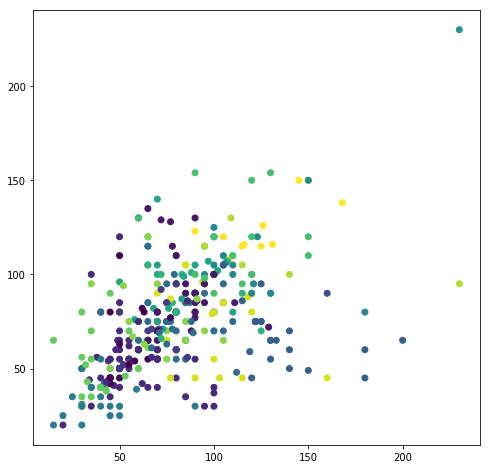

In [15]:
kmeans = KMeans(n_clusters=dostepne_typy.size, random_state=0)
kmeans.fit(pokemon_bez_klas)
etykiety_klastrow = kmeans.fit_predict(pokemon_bez_klas)
plt.figure(figsize=(8,8))
plt.scatter(pokemon_bez_klas.Defense, pokemon_bez_klas.SpDef, marker='o', c=etykiety_klastrow)

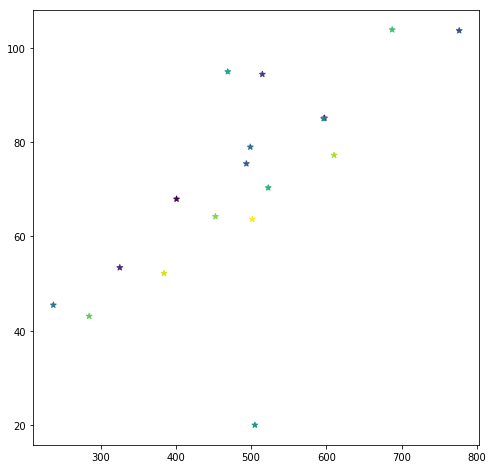

In [16]:
plt.figure(figsize=(8,8))
plt.plot()
centroidy = kmeans.cluster_centers_
plt.scatter(centroidy[:,0], centroidy[:,1], marker='*', c=np.array(range(dostepne_typy.size)))

Z powyższych wykresów można zobaczyć jak trudnym zbiorem do analizy są Pokemony. Pierwsze co rzuca się w oczy to fakt, że centroidy mają współrzędną x wykraczającą poza wartości parametru Defense. Można z tego wnioskować, że wygenerowane 18 grup metodą k-średnich nie są prawidłowo pogrupowane w obrębie typów pokemonów. W związku z tym, że znana jest nam liczba grup (liczba dostępnych typów Pokemonów), nie możemy zwiększyć dokładnośći wyznaczania grup poprzez zmniejszenie liczby klastrów.

# Uczenie nadzorowane

`Importy` potrzebne do dalszych operacji na danych:

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

Funkcje służące do przeprowadzenia testów uczenia:

In [145]:
def podziel(df, proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def weryfikuj(model, dane, atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"])
    
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:, atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:, atryb])    
    print("Macierz pomyłek dla zbioru uczącego")
    display(pd.crosstab(dane["dec_ucz"], wynik_ucz)) 
    print("Macierz pomyłek dla zbioru testowego")
    display(pd.crosstab(dane["dec_test"], wynik_test))
    return pd.crosstab(dane["dec_test"], wynik_test)

def czestosc(pomyl):
    suma = 0.0
    for index in pomyl.index:
        for col in pomyl.columns:
            #print(index == col)
            if (index == col):
                suma +=  pomyl.loc[index, col]
    suma /=  pomyl.sum().sum()
    print("Częstość wynosi %f" % suma)

#### Najbliższy sąsiad

In [152]:
dane_do_sasiada = pokemon.copy()
dane_do_sasiada = dane_do_sasiada[['Type2','Total','HP','Attack','Defense','SpAtk','SpDef','Speed','Generation','Legendary','Type1']]
dane = podziel(dane_do_sasiada, 0.2)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=1)
# weryfikacja}
m_pomylki = weryfikuj(model,dane,[5,6,7])

Liczba obiektów zbioru uczącego:  640
Liczba obiektów zbioru testowego:  160
Macierz pomyłek dla zbioru uczącego


col_0  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
row_0                                                                        
0      51   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
1       0  23   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0
2       0   0  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3       0   0   0  36   0   0   1   1   0   0   0   0   0   0   0   0   0   1
4       0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0
5       0   0   0   0   0  19   0   0   0   0   0   0   1   0   0   0   0   0
6       0   0   0   0   0   0  38   0   0   1   0   0   0   0   1   0   0   0
7       0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0
8       0   0   0   0   0   0   0   0  24   0   0   0   0   0   1   0   0   0
9       0   0   0   0   0   0   1   0   0  54   0   0   1   0   0   0   0   1
10      0   0   0   0   0   0   0   0   0   0  24   0   0   0   0   0   0   0
11      0   0   0   0   0   0   0   0   0   0   1  16   0   0   0   0   0   0
12      0   0   1   0   0   0   0   0   0   1   0   0  83   0   0   0   0   1
13      0   0   0   0   0   0   0   0   0   0   0   0   0  25   0   0   0   0
14      0   0   0   0   0   0   0   0   0   0   0   0   0   0  46   0   0   2
15      0   0   0   0   0   1   0   0   0   0   0   0   1   0   0  33   0   0
16      0   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0  17   2
17      1   0   0   0   0   0   1   0   0   1   0   1   0   0   0   0   0  80

Macierz pomyłek dla zbioru testowego


col_0  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
row_0                                                                        
0       4   0   1   0   1   2   0   0   0   2   2   0   1   0   0   1   1   2
1       0   0   0   0   0   0   1   0   0   0   0   0   2   0   0   1   0   2
2       0   2   1   0   1   0   0   0   0   0   0   1   2   0   1   0   1   1
3       0   0   0   2   0   2   0   0   0   0   0   0   0   0   0   0   0   1
4       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
5       0   2   0   0   0   2   0   0   0   0   0   0   0   1   0   1   0   1
6       1   1   0   0   0   0   2   0   0   3   0   0   0   0   2   0   0   3
8       0   0   1   0   0   0   0   0   1   1   0   1   0   0   0   0   1   2
9       0   0   1   0   1   0   0   0   0   0   0   0   4   2   1   1   1   2
10      2   0   0   0   0   0   1   0   0   1   0   0   2   1   0   0   0   1
11      0   0   1   1   0   0   1   0   0   2   0   0   0   0   0   1   0   1
12      0   0   0   0   1   0   0   0   0   0   1   0   4   2   0   2   1   1
13      0   0   0   0   0   1   0   0   1   0   0   1   0   0   0   0   0   0
14      0   0   1   0   0   1   1   0   1   1   1   0   1   0   0   1   0   1
15      2   1   0   0   0   0   0   0   1   0   0   0   0   0   0   2   2   1
16      0   0   0   0   0   0   0   0   1   0   0   1   0   0   0   1   0   2
17      2   0   0   1   0   0   2   1   1   4   1   1   3   1   4   2   1   4

In [153]:
czestosc(m_pomylki)
m_pomylki.describe()

Częstość wynosi 0.137500


col_0         0          1          2          3          4          5   \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.647059   0.352941   0.352941   0.235294   0.235294   0.470588   
std     1.169464   0.701888   0.492592   0.562296   0.437237   0.799816   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     1.000000   0.000000   1.000000   0.000000   0.000000   1.000000   
max     4.000000   2.000000   1.000000   2.000000   1.000000   2.000000   

col_0         6          7          8          9          10         11  \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.470588   0.058824   0.352941   0.823529   0.294118   0.294118   
std     0.717430   0.242536   0.492592   1.236694   0.587868   0.469668   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     1.000000   0.000000   1.000000   1.000000   0.000000   1.000000   
max     2.000000   1.000000   1.000000   4.000000   2.000000   1.000000   

col_0         12         13         14         15         16         17  
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000  
mean    1.117647   0.411765   0.470588   0.764706   0.470588   1.588235  
std     1.452685   0.712287   1.067570   0.752447   0.624264   0.939336  
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000   0.000000   0.000000   1.000000  
50%     0.000000   0.000000   0.000000   1.000000   0.000000   1.000000  
75%     2.000000   1.000000   0.000000   1.000000   1.000000   2.000000  
max     4.000000   2.000000   4.000000   2.000000   2.000000   4.000000

Wnioski dla n_neighbours=1
O ile macierz pomyłek dla zbioru uczącego pokazuje, że wiekszość typów zosta przydzielonych prawidłowo, o tyle dla testowego zbioru danych nie wielka liczba Pokemonów przydzielona została do odpowiedniej grupy. Związane jest to z słabo skorelowanymi atrybutami dla naszych danych.

In [154]:
model = KNeighborsClassifier(n_neighbors=3)
# weryfikacja
m_pomylki = weryfikuj(model,dane,[5,6,7])

Macierz pomyłek dla zbioru uczącego


col_0  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
row_0                                                                        
0      45   1   0   0   0   1   0   0   0   1   1   0   1   0   0   0   0   2
1       3  20   0   0   0   0   0   0   0   1   0   0   1   0   0   0   0   0
2       1   2  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
3       3   3   2  26   0   0   2   0   0   0   0   0   3   0   0   0   0   0
4       3   1   1   0   9   0   0   0   0   0   0   0   0   0   0   0   0   1
5       3   2   1   0   0  14   0   0   0   0   0   0   0   0   0   0   0   0
6       0   1   2   5   2   2  23   0   0   0   0   0   2   0   1   0   0   2
7       0   0   1   1   0   0   0   2   0   0   0   0   0   0   0   0   0   0
8       4   0   0   2   1   2   1   0  14   0   0   0   0   0   1   0   0   0
9       7   2   3   6   2   2   6   1   4  23   0   0   0   0   1   0   0   0
10      5   0   3   2   0   2   0   0   1   2   7   0   1   0   1   0   0   0
11      1   0   1   2   1   0   1   0   0   3   1   6   0   0   0   0   0   1
12     11   7   2   3   0   5   6   0   1   3   4   1  42   0   0   0   0   1
13      2   1   1   0   1   1   2   1   4   3   2   1   3   2   0   0   0   1
14      3   2   4   2   2   2   4   1   3   1   0   1   1   1  20   0   0   1
15      4   1   2   3   1   3   3   0   1   5   3   1   3   0   3   2   0   0
16      5   3   2   1   2   0   0   0   0   1   1   1   1   1   2   0   2   0
17      7   4   3   9   3   1   8   1   3   7   3   4   7   0   3   0   1  20

Macierz pomyłek dla zbioru testowego


col_0  0   1   2   3   4   5   6   8   9   11  12  13  14  15  16  17
row_0                                                                
0       4   2   2   0   1   1   0   2   3   0   2   0   0   0   0   0
1       2   2   0   0   0   1   1   0   0   0   0   0   0   0   0   0
2       1   3   1   0   1   1   1   0   1   1   0   0   0   0   0   0
3       1   1   0   2   0   1   0   0   0   0   0   0   0   0   0   0
4       1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
5       2   3   0   0   0   0   1   1   0   0   0   0   0   0   0   0
6       1   1   2   1   0   0   3   1   1   0   0   0   2   0   0   0
8       0   0   1   0   0   0   0   1   0   0   1   1   1   0   0   2
9       3   0   1   1   2   0   1   0   1   0   1   0   1   0   1   1
10      3   1   0   0   1   1   1   0   0   0   1   0   0   0   0   0
11      1   0   1   2   0   0   0   0   2   0   0   0   0   1   0   0
12      2   0   1   3   1   1   0   0   0   0   3   0   0   0   0   1
13      0   0   0   0   1   1   1   0   0   0   0   0   0   0   0   0
14      1   0   1   3   0   1   1   0   0   0   0   0   2   0   0   0
15      3   2   0   1   0   0   0   2   0   0   0   0   0   0   0   1
16      0   0   0   0   0   0   0   2   0   1   0   0   1   0   0   1
17      8   0   3   7   0   2   3   1   1   1   2   0   0   0   0   0

In [155]:
czestosc(m_pomylki)
m_pomylki.describe()

Częstość wynosi 0.118750


col_0         0          1          2          3          4          5   \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    1.941176   0.882353   0.764706   1.176471   0.411765   0.588235   
std     1.951621   1.111438   0.903425   1.845105   0.618347   0.618347   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     1.000000   0.000000   1.000000   0.000000   0.000000   1.000000   
75%     3.000000   2.000000   1.000000   2.000000   1.000000   1.000000   
max     8.000000   3.000000   3.000000   7.000000   2.000000   2.000000   

col_0         6          8          9          11         12         13  \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.764706   0.588235   0.529412   0.176471   0.588235   0.058824   
std     0.970143   0.795206   0.874475   0.392953   0.939336   0.242536   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     1.000000   1.000000   1.000000   0.000000   1.000000   0.000000   
max     3.000000   2.000000   3.000000   1.000000   3.000000   1.000000   

col_0         14         15         16         17  
count  17.000000  17.000000  17.000000  17.000000  
mean    0.411765   0.058824   0.058824   0.411765  
std     0.712287   0.242536   0.242536   0.618347  
min     0.000000   0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000   0.000000  
50%     0.000000   0.000000   0.000000   0.000000  
75%     1.000000   0.000000   0.000000   1.000000  
max     2.000000   1.000000   1.000000   2.000000

In [156]:
model = KNeighborsClassifier(n_neighbors=9)
# weryfikacja
m_pomylki = weryfikuj(model,dane,[5,6,7])

Macierz pomyłek dla zbioru uczącego


col_0  0   1   2   3   4   5   6   8   9   10  11  12  13  14  15  16  17
row_0                                                                    
0      28   1   0   1   1   1   2   0   2   3   0   9   1   0   0   0   3
1       5   7   0   0   0   0   3   0   2   0   0   2   1   1   0   1   3
2       1   3   6   3   0   0   1   0   1   0   0   2   0   4   0   1   0
3       1   2   0  20   0   0   6   0   2   0   0   6   0   0   1   0   1
4       1   1   1   0   6   0   0   0   0   1   0   0   0   0   1   1   3
5       5   2   1   1   0   1   2   1   1   0   0   5   0   0   0   0   1
6       1   3   1   4   0   0  17   0   3   0   0   5   0   2   0   0   4
7       0   0   0   2   0   0   1   0   0   0   0   0   0   0   0   0   1
8       4   1   0   2   0   2   4   2   2   0   0   4   0   1   1   0   2
9       6   0   3   6   0   0   5   1  21   1   0   4   1   3   0   1   5
10      3   1   0   2   0   0   1   1   1   6   0   6   0   1   1   1   0
11      1   1   1   1   0   1   2   0   1   0   0   1   1   2   2   1   2
12     11   2   1   4   0   1   4   1   6   0   0  47   0   1   1   2   5
13      5   0   0   1   0   0   1   3   2   1   1   6   4   0   0   0   1
14      3   3   3   8   0   0   0   0   8   1   0   1   0  16   0   0   5
15      6   2   2   1   0   0   2   1   6   0   0   7   0   0   3   2   3
16      2   0   1   2   1   0   0   1   2   2   1   1   1   0   0   6   2
17     11   0   2   4   0   1   5   1   8   2   0  11   0   5   2   0  32

Macierz pomyłek dla zbioru testowego


col_0  0   1   2   3   4   5   6   8   9   10  12  13  14  15  16  17
row_0                                                                
0       9   1   0   0   0   1   1   0   0   0   2   1   0   0   1   1
1       0   0   0   0   0   0   1   1   0   0   1   0   0   0   0   3
2       0   1   2   0   1   0   1   0   0   0   3   0   0   2   0   0
3       0   0   1   1   0   0   0   0   0   0   2   0   0   0   0   1
4       1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
5       2   0   0   0   0   0   0   0   2   0   2   0   0   1   0   0
6       0   0   2   4   0   0   4   0   1   0   1   0   0   0   0   0
8       1   1   0   1   1   0   1   1   0   0   1   0   0   0   0   0
9       2   0   0   1   1   0   0   2   0   0   3   0   2   1   0   1
10      2   1   0   0   1   0   1   0   0   0   3   0   0   0   0   0
11      0   0   0   2   1   0   1   0   0   1   0   1   1   0   0   0
12      4   0   0   1   1   0   0   0   1   0   5   0   0   0   0   0
13      0   0   0   0   0   0   1   1   0   0   1   0   0   0   0   0
14      1   0   0   3   0   0   1   0   1   0   1   0   1   0   0   1
15      4   2   0   0   0   0   1   0   0   1   1   0   0   0   0   0
16      0   0   0   0   0   1   0   0   0   0   2   0   1   0   0   1
17      5   2   1   2   0   2   2   0   4   0   2   4   0   1   1   2

In [157]:
czestosc(m_pomylki)
m_pomylki.describe()

Częstość wynosi 0.156250


col_0         0          1          2          3          4          5   \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    1.823529   0.470588   0.352941   0.882353   0.352941   0.235294   
std     2.455486   0.717430   0.701888   1.218726   0.492592   0.562296   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     2.000000   1.000000   0.000000   1.000000   1.000000   0.000000   
max     9.000000   2.000000   2.000000   4.000000   1.000000   2.000000   

col_0         6          8          9          10         12         13  \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.882353   0.294118   0.529412   0.117647   1.764706   0.352941   
std     0.992620   0.587868   1.067570   0.332106   1.251470   0.996317   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
50%     1.000000   0.000000   0.000000   0.000000   2.000000   0.000000   
75%     1.000000   0.000000   1.000000   0.000000   2.000000   0.000000   
max     4.000000   2.000000   4.000000   1.000000   5.000000   4.000000   

col_0         14         15         16         17  
count  17.000000  17.000000  17.000000  17.000000  
mean    0.294118   0.294118   0.117647   0.647059  
std     0.587868   0.587868   0.332106   0.861770  
min     0.000000   0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000   0.000000  
50%     0.000000   0.000000   0.000000   0.000000  
75%     0.000000   0.000000   0.000000   1.000000  
max     2.000000   2.000000   1.000000   3.000000

Wnioski dla n_neighbours= [3, 9]
<br>Wraz ze wrostem liczby sąsiadów można zaobserować nieznaczną poprawę wyników. Jednak jest to na tyle mała poprawa, że wciąż uznajmey, że algorytm nie podołał tym danym.

#### Metoda najbliższych prototypów

In [158]:
model = NearestCentroid()
m_pomylki = weryfikuj(model,dane,[5,6,7])

Macierz pomyłek dla zbioru uczącego


col_0  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
row_0                                                                    
0       2   3   0   1   4   4   4   4   1   1  15   0   4   3   1   0   5
1       0   1   0   0   3   2   1   4   0   0   5   1   2   1   3   1   1
2       1   0   3   0   1   0   0   3   0   0   1   1   0   2   8   0   2
3       0   0   1   1   1   1   1  11   0   2   1   0   4   5  10   0   1
4       0   0   0   0   3   0   1   0   0   0   0   0   0   2   4   0   5
5       0   1   0   0   0   3   0   5   0   0   6   0   1   1   0   1   2
6       1   1   2   1   2   0   5   8   0   1   0   1   3   8   7   0   0
7       0   0   0   0   0   0   0   3   0   0   1   0   0   0   0   0   0
8       0   1   3   0   3   2   1   3   0   1   3   0   0   3   1   0   4
9       1   0   4   1   6   1   4   7   3   4   6   0   1   8   5   1   5
10      3   0   1   0   0   0   0   3   0   0   7   0   3   2   2   0   3
11      0   2   2   0   0   0   0   2   1   1   2   0   1   3   1   0   2
12      6   2   1   1   5   4   2  10   1   1  15   1  17   9   4   0   7
13      3   3   0   1   2   1   2   1   0   1   6   0   0   4   0   0   1
14      0   0   9   0   7   0   0  12   1   0   2   0   0   5   8   1   3
15      1   1   3   0   4   0   1   4   0   1   7   2   2   2   1   0   6
16      0   1   1   0   3   0   0   1   0   0   3   0   1   5   3   0   4
17      2   4   9   0  12   0   2   5   2   4   9   0   6  14   6   1   8

Macierz pomyłek dla zbioru testowego


col_0  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  16  17
row_0                                                                    
0       0   2   0   0   1   1   0   2   0   0   6   0   0   2   1   2   0
1       0   0   0   0   0   0   1   2   0   0   1   2   0   0   0   0   0
2       0   1   0   0   0   0   0   0   0   0   1   0   1   1   6   0   0
3       0   0   0   1   0   0   0   2   0   0   1   0   0   0   1   0   0
4       0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0
5       1   0   0   0   0   1   0   0   0   0   4   0   0   1   0   0   0
6       0   0   0   0   2   0   1   1   0   0   1   0   0   2   4   1   0
8       0   0   0   0   1   0   1   0   0   1   1   0   0   0   2   1   0
9       0   1   1   0   4   0   0   0   0   0   2   0   2   1   0   2   0
10      1   1   0   0   1   0   0   0   0   0   0   0   2   2   1   0   0
11      0   0   2   0   0   0   0   0   0   0   0   0   0   2   2   1   0
12      0   2   0   0   1   0   0   1   0   0   4   0   4   0   0   0   0
13      0   2   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
14      0   0   0   0   1   0   0   3   0   0   0   0   0   2   2   1   0
15      0   0   0   0   3   1   0   0   0   0   1   0   0   2   0   2   0
16      0   1   0   0   2   0   0   0   0   0   0   0   0   0   1   1   0
17      2   1   1   2   2   1   0   4   1   1   1   0   2   4   5   0   1

In [159]:
czestosc(m_pomylki)
m_pomylki.describe()

Częstość wynosi 0.075000


col_0         0          1          2          3          4          5   \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.235294   0.647059   0.235294   0.176471   1.176471   0.235294   
std     0.562296   0.785905   0.562296   0.528594   1.131111   0.437237   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
75%     0.000000   1.000000   0.000000   0.000000   2.000000   0.000000   
max     2.000000   2.000000   2.000000   2.000000   4.000000   1.000000   

col_0         6          7          8          9          10         11  \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.176471   0.882353   0.058824   0.117647   1.352941   0.117647   
std     0.392953   1.268974   0.242536   0.332106   1.729927   0.485071   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
75%     0.000000   2.000000   0.000000   0.000000   1.000000   0.000000   
max     1.000000   4.000000   1.000000   1.000000   6.000000   2.000000   

col_0         12         13         14         16         17  
count  17.000000  17.000000  17.000000  17.000000  17.000000  
mean    0.647059   1.176471   1.470588   0.647059   0.058824  
std     1.169464   1.131111   1.874755   0.785905   0.242536  
min     0.000000   0.000000   0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000   0.000000   0.000000  
50%     0.000000   1.000000   1.000000   0.000000   0.000000  
75%     1.000000   2.000000   2.000000   1.000000   0.000000  
max     4.000000   4.000000   6.000000   2.000000   1.000000

Wnioski
W tym przypadku definitywnie możemy stwierdzić, że algorytm wykonał pracę ze skutkiem negatywnym. Już na podstawie zbioru uczącego widać, że typy zostały przydzielone z wielką niedokładnością

#### Naiwny klasyfikator Bayesa

In [160]:
model = GaussianNB()
m_pomylki = weryfikuj(model,dane,[5,6,7])

Macierz pomyłek dla zbioru uczącego


col_0  0   3   4   6   9   12  14  15  17
row_0                                    
0       5   1   0   2   0  32   2   1   9
1       0   3   1   0   0  11   3   0   7
2       0   2   0   1   0   5   9   0   5
3       0   6   0   5   0  11  11   0   6
4       3   0   0   0   0   3   4   0   5
5       1   1   0   2   0  11   1   0   4
6       0   7   0   5   2  12   4   0  10
7       0   2   0   0   0   1   1   0   0
8       1   2   0   1   0  11   3   0   7
9       1   4   0   5   3  18   5   1  20
10      1   1   0   2   0  17   1   0   2
11      2   3   0   0   0   6   1   0   5
12      6   2   0   3   1  54   5   0  15
13      1   0   0   2   0  17   0   0   5
14      2   5   0   1   4   7  19   0  10
15      3   1   1   0   1  16   3   0  10
16      1   2   0   0   0  12   2   0   5
17      2   3   0   2   4  33   6   0  34

Macierz pomyłek dla zbioru testowego


col_0  0   3   4   6   9   12  14  17
row_0                                
0       3   1   0   0   0   9   2   2
1       0   1   0   0   0   3   0   2
2       0   1   0   0   0   4   5   0
3       0   0   0   0   0   4   1   0
4       0   0   0   0   1   1   0   0
5       0   0   0   0   0   7   0   0
6       1   2   0   0   1   3   4   1
8       0   0   1   0   0   2   2   2
9       1   0   0   0   1   7   1   3
10      1   0   0   1   0   5   0   1
11      0   0   0   1   0   2   3   1
12      0   0   0   0   0  11   0   1
13      0   0   0   0   0   2   0   1
14      0   3   0   1   0   3   1   1
15      1   0   1   0   0   5   0   2
16      1   0   0   0   0   0   1   3
17      1   1   0   4   1  11   3   7

In [161]:
czestosc(m_pomylki)
m_pomylki.describe()

Częstość wynosi 0.143750


col_0         0          3          4          6          9          12  \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.529412   0.529412   0.117647   0.411765   0.235294   4.647059   
std     0.799816   0.874475   0.332106   1.003670   0.437237   3.315516   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   2.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   4.000000   
75%     1.000000   1.000000   0.000000   0.000000   0.000000   7.000000   
max     3.000000   3.000000   1.000000   4.000000   1.000000  11.000000   

col_0         14         17  
count  17.000000  17.000000  
mean    1.352941   1.588235  
std     1.578812   1.697749  
min     0.000000   0.000000  
25%     0.000000   1.000000  
50%     1.000000   1.000000  
75%     2.000000   2.000000  
max     5.000000   7.000000

Wnioski zbiorcze do klasyfikatora Bayersa i drzewa decyzyjnego na samym dole

#### Drzewo decyzyjne

In [162]:
model = tree.DecisionTreeClassifier(max_depth=7)
m_pomylki = weryfikuj(model,dane,[5,6,7])

Macierz pomyłek dla zbioru uczącego


col_0  0   1   2   3   5   6   8   9   10  12  13  14  15  16  17
row_0                                                            
0      29   0   0   1   0   1   0   1   0   5   5   1   0   1   8
1       2   9   0   0   0   2   1   1   0   1   1   1   0   3   4
2       1   2   8   1   0   1   0   0   0   0   1   3   0   1   4
3       0   3   1  12   0   4   0   4   0   2   0   2   0   0  11
4       2   0   0   0   0   0   0   1   0   0   2   2   0   1   7
5       3   0   0   3   2   2   0   0   1   2   3   0   0   2   2
6       1   0   0   2   0  19   0   5   0   2   0   2   0   0   9
7       0   1   0   0   0   2   0   0   0   0   0   0   0   0   1
8       1   1   0   0   0   2  13   1   0   1   0   2   0   1   3
9       3   1   1   2   0   6   0  13   0   2   1   5   0   6  17
10      5   1   0   1   0   1   0   0   6   2   3   0   0   3   2
11      1   0   0   1   0   3   0   0   1   0   0   1   0   2   8
12      8   0   1   2   0   2   0   0   1  52   0   3   0   2  15
13      4   0   0   0   0   0   0   1   1   2  11   0   0   1   5
14      3   0   2   2   0   1   0   2   1   0   0  27   0   0  10
15      5   2   1   0   0   2   0   1   0   4   0   0   5   4  11
16      0   0   1   1   0   0   0   1   2   1   3   1   0   9   3
17      4   0   2   0   0   3   0   2   0   1   3   4   0   2  63

Macierz pomyłek dla zbioru testowego


col_0  0   1   2   3   5   6   8   9   10  12  13  14  15  16  17
row_0                                                            
0       7   1   0   0   0   1   1   0   1   1   1   1   0   2   1
1       2   0   0   0   0   2   0   0   0   1   0   0   0   0   1
2       0   2   1   0   0   0   0   0   0   1   1   3   0   1   1
3       0   0   0   4   0   0   0   0   0   0   0   0   0   0   1
4       0   0   0   0   0   0   0   0   0   0   0   1   0   0   1
5       1   0   0   0   1   0   0   0   1   2   1   0   0   0   1
6       1   0   1   2   0   2   0   2   0   0   0   1   0   0   3
8       0   0   0   0   0   1   1   0   0   0   0   2   0   1   2
9       1   0   1   0   0   0   0   0   0   3   1   2   1   2   2
10      0   1   0   0   0   1   1   0   0   4   0   0   0   0   1
11      0   0   0   0   0   0   0   0   0   0   0   1   1   0   5
12      3   2   0   0   0   0   0   0   2   3   0   0   0   0   2
13      0   0   0   0   0   1   0   0   0   0   0   0   1   0   1
14      0   0   0   1   0   2   0   0   0   0   0   1   0   1   4
15      1   0   0   0   0   0   1   1   0   0   0   1   0   2   3
16      1   0   0   0   0   0   0   0   0   1   1   1   0   0   1
17      1   4   1   1   0   2   2   2   0   5   1   1   0   2   6

In [163]:
czestosc(m_pomylki)
m_pomylki.describe()

Częstość wynosi 0.162500


col_0         0          1          2          3          5          6   \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    1.058824   0.588235   0.235294   0.470588   0.058824   0.705882   
std     1.748949   1.121318   0.437237   1.067570   0.242536   0.848875   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     1.000000   1.000000   0.000000   0.000000   0.000000   1.000000   
max     7.000000   4.000000   1.000000   4.000000   1.000000   2.000000   

col_0         8          9          10         12         13         14  \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.352941   0.294118   0.235294   1.235294   0.352941   0.882353   
std     0.606339   0.685994   0.562296   1.601929   0.492592   0.857493   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   1.000000   0.000000   1.000000   
75%     1.000000   0.000000   0.000000   2.000000   1.000000   1.000000   
max     2.000000   2.000000   2.000000   5.000000   1.000000   3.000000   

col_0         15         16         17  
count  17.000000  17.000000  17.000000  
mean    0.176471   0.647059   2.117647  
std     0.392953   0.861770   1.576482  
min     0.000000   0.000000   1.000000  
25%     0.000000   0.000000   1.000000  
50%     0.000000   0.000000   1.000000  
75%     0.000000   1.000000   3.000000  
max     1.000000   2.000000   6.000000

Wnioski
Oba podejścia nie dały dobrych rezultatów. Na pierwszy rzut oka widać, że grup jest znacznie mniej niż oczekiwaliśmy. O ile drzewo decyzyjne wygenerowało dla zbiory testowego trochę więcej grup, to klasyfikator Bayersa w tym przypadku nie ma sensu.

Podsumowując projekt trzeba stwierdzić, że Pokemony są bardzo niewdzięcznym zbiorem danych. Trudność pracy na tych danych polega na ich braku jakichkolwiek powiązań pomiędzy atrybutami. Uważamy, że są ciekawe jedynie do analizy oraz na dużym ekranie. Jako zbiór do uczenia maszynowego się nie nadają.

## Drzewo decyzyjne dla równego rozkładu danych

In [164]:
from sklearn import datasets, svm

In [165]:
# Funkcja wyrównująca ilość poszczególnych typów
def wybierz (zbior, typy, ilosc):
    matrix = zbior.iloc[0:0]    
    for name in typy:
        counter = 0
        for i in range(0, zbior.Type1.count()):
            if(zbior.iloc[i,0] == name):
                matrix = matrix.append(zbior.iloc[i])
                counter = counter + 1
                if(counter == ilosc):
                    break
    return matrix    

In [168]:
dane = wybierz(pokemon, pokemon.Type1.unique()[:-1], 20)
dane = dane[['Type2','Total','HP','Attack','Defense','SpAtk','SpDef','Speed','Generation','Legendary','Type1']]
dane = podziel(dane, 0.2)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))
model = tree.DecisionTreeClassifier(max_depth=7)
m_pomylki = weryfikuj(model,dane,[5,6,7])

Liczba obiektów zbioru uczącego:  269
Liczba obiektów zbioru testowego:  68
Macierz pomyłek dla zbioru uczącego


col_0  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
row_0                                                                    
0      10   0   0   1   0   1   0   0   0   0   0   1   0   0   0   2   2
1       0   9   0   0   2   1   0   0   0   0   0   0   0   0   0   0   0
2       0   0  13   0   0   0   0   0   2   0   0   0   0   0   0   0   2
3       0   0   2  11   0   0   0   0   1   0   0   0   0   0   0   0   1
4       2   0   1   0  10   0   0   0   0   0   0   0   0   0   0   0   3
5       2   1   0   0   0   9   0   0   0   0   0   1   1   0   0   1   1
6       1   0   1   0   1   0   8   0   0   0   0   0   0   1   0   0   1
7       0   0   0   0   1   0   1  11   0   0   0   0   0   1   0   0   1
8       1   0   0   0   3   0   0   0   7   0   0   1   0   0   0   0   3
9       0   1   0   0   0   2   0   0   0   8   0   0   1   0   0   1   2
10      0   0   2   0   1   1   1   0   1   0   6   0   0   0   0   1   2
11      1   1   0   1   0   0   0   0   0   0   0  11   0   0   0   0   2
12      0   0   1   0   0   0   0   0   1   1   0   0   7   0   0   0   4
13      2   0   1   0   0   0   0   1   0   0   0   0   0  12   0   0   2
14      1   1   0   1   2   1   0   0   1   1   0   0   0   0   4   2   4
15      0   1   0   0   3   0   0   0   0   0   0   0   0   1   0  11   2
16      2   1   0   0   1   0   0   1   0   0   0   0   0   1   0   0  13

Macierz pomyłek dla zbioru testowego


col_0  0   1   2   3   4   5   6   7   8   9   11  12  14  15  16
row_0                                                            
0       1   0   0   0   0   2   0   0   0   0   0   0   0   0   0
1       1   1   1   0   0   1   1   1   0   0   1   0   0   1   0
2       0   0   1   0   0   0   1   0   0   0   0   0   1   0   0
3       0   2   1   0   0   0   0   1   1   0   0   0   0   0   0
4       0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
5       1   0   0   0   0   1   0   1   0   1   0   0   0   0   0
6       0   1   0   1   0   0   3   0   1   0   0   1   0   0   0
7       0   0   0   0   0   1   0   0   0   0   0   0   0   3   1
8       1   0   0   0   1   0   0   1   1   0   0   0   0   1   0
9       1   0   0   0   1   0   0   1   0   0   0   1   0   1   0
10      0   0   0   0   0   0   1   1   0   0   0   0   1   0   2
11      0   0   0   2   0   0   0   0   0   0   1   1   0   0   0
12      1   0   0   1   1   0   0   1   0   1   0   0   0   0   1
13      0   1   1   0   0   0   0   0   0   0   0   0   0   0   0
14      0   1   0   0   1   0   0   0   0   0   0   0   0   0   0
15      0   0   0   0   0   0   0   0   0   1   0   0   0   1   0
16      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [169]:
czestosc(m_pomylki)
m_pomylki.describe()

Częstość wynosi 0.147059


col_0         0          1          2          3          4          5   \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.411765   0.352941   0.235294   0.235294   0.235294   0.294118   
std     0.507300   0.606339   0.437237   0.562296   0.437237   0.587868   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     1.000000   1.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   2.000000   1.000000   2.000000   1.000000   2.000000   

col_0         6          7          8          9          11         12  \
count  17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean    0.352941   0.411765   0.176471   0.176471   0.117647   0.176471   
std     0.785905   0.507300   0.392953   0.392953   0.332106   0.392953   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   1.000000   0.000000   0.000000   0.000000   0.000000   
max     3.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

col_0         14         15         16  
count  17.000000  17.000000  17.000000  
mean    0.117647   0.470588   0.235294  
std     0.332106   0.799816   0.562296  
min     0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000  
50%     0.000000   0.000000   0.000000  
75%     0.000000   1.000000   0.000000  
max     1.000000   3.000000   2.000000

Zmiana danych dla drzewa decyzyjnego nie przyniosła nam oczekiwanej poprawy wyniku klasyfikacji.